In [13]:

import numpy as np # linear algebra
import dicom
import os
import scipy.ndimage
import matplotlib.pyplot as plt
from config import *
from modelIO import *
#from dataIO import *
from model import *
from display import *
from skimage import measure, morphology
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from sklearn.preprocessing import MinMaxScaler,RobustScaler
import cv2 as cv

def normalizeImageIntensityRange(img):
    img[img < HOUNSFIELD_MIN] = HOUNSFIELD_MIN
    img[img > HOUNSFIELD_MAX] = HOUNSFIELD_MAX
   
    return  ((img - HOUNSFIELD_MIN) / HOUNSFIELD_RANGE) 


6.12.93.nii
(40, 40, 40)
[array([ 821.208125  ,  899.7683125 ,  737.4273125 , ..., 1078.9109375 ,
        972.47165625,  871.9183125 ])]


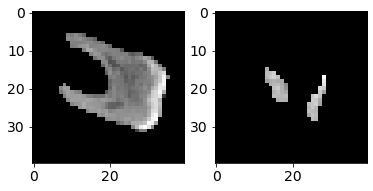

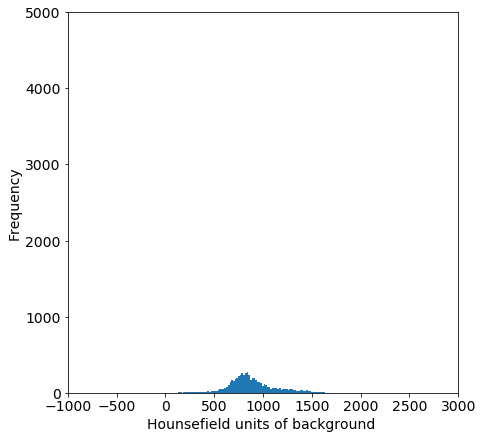

5.4.84.nii
(40, 40, 40)
[array([ 821.208125  ,  899.7683125 ,  737.4273125 , ..., 1078.9109375 ,
        972.47165625,  871.9183125 ]), array([691.56289062, 717.9171875 , 929.87832031, ..., 655.09472656,
       761.71707031, 685.18285156])]


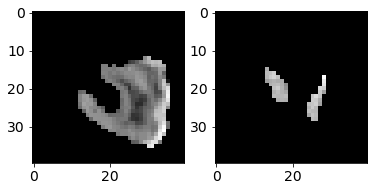

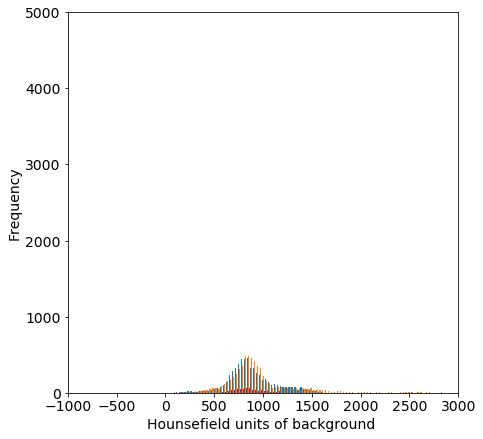

4.2.78.nii
(40, 40, 40)


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

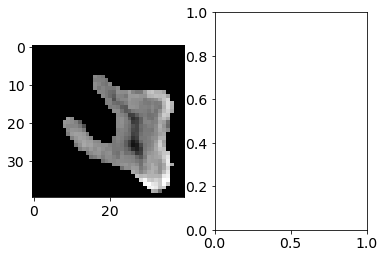

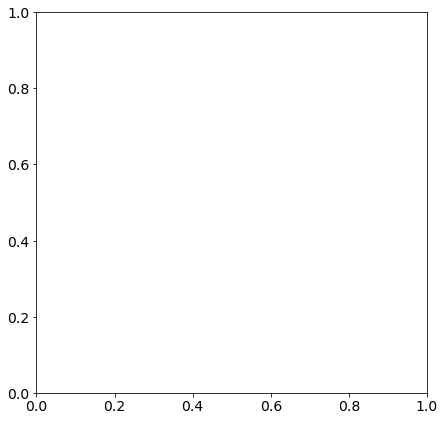

In [23]:
#Experiment1 - Normalisation of HU units and plotting histogram to display CBCT range

data_type = ['molar','canine']
dirs = os.listdir(os.path.join(data_dir_train+str('image')))

tooth_hu= [] 
fullImage_hu=[]   
background_hu=[]
SMALL_SIZE = 14
MEDIUM_SIZE = 14
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

#for d in dirs:
#    d='mandible-Right-Molar'
 #   for iterations in os.listdir(os.path.join(data_dir_train+str('image'),d)):
 #       for niiImage in os.listdir(os.path.join(data_dir_train,str('image'),d,iterations)):
#
 #           img = nib.load(os.path.join(data_dir_train,str('image'),d,iterations, niiImage))
#            msk = nib.load(os.path.join(data_dir_train,str('mask'),d, niiImage))

#            image = (resize_data(img.get_fdata()))
#            mask =  (resize_data(msk.get_fdata()))

#            fullImage_hu.append(image)

for d in dirs:
    if d=='mandible-Right-Molar':
        for iterations in os.listdir(os.path.join(data_dir_train+str('image'),d)):
            if iterations=='iteration1':
                for niiImage in os.listdir(os.path.join(data_dir_train,str('image'),d,iterations)):
                    img = nib.load(os.path.join(data_dir_train,str('image'),d,iterations, niiImage))
                    msk = nib.load(os.path.join(data_dir_train,str('mask'),d, niiImage))
                    print(niiImage)
                    image = (resize_data(img.get_fdata()))
                    mask =  np.round((resize_data(msk.get_fdata())))
                    
                   # image = normalizeImageIntensityRange(image) 
                    image[mask==0] = 0
                    print(image.shape)
                    fig, (ax1,ax2) = plt.subplots(1,2)
                    f = plt.figure() 
                    f.set_figwidth(7) 
                    f.set_figheight(7) 
                    ax1.imshow(image[20], cmap="gray")
                    image = image[mask==1]
                    
                    plt.hist([np.array(tooth_hu).flatten()],1000,[-1000,3000], color=['r'])
                    image2[mask==0]=1
                    ax2.imshow(image2[:,:,20], cmap="gray")
                    tooth_hu.append(np.array(image).flatten())
                    print(tooth_hu)
                    plt.hist(np.array(tooth_hu).flatten(),100)      
                    plt.xlim([-1000,3000])
                    plt.ylim([0,5000])
                    plt.xlabel('Hounsefield units of background ')
                    plt.ylabel('Frequency')
                    plt.show()


In [ ]:


data_type = 'molar'
dirs = os.listdir(os.path.join(data_dir_train,str('image')))
l = []
k=[]
for d in dirs:
    d='mandible-Right-Canine'
    for iterations in os.listdir(os.path.join(data_dir_train+str('image'),d)):
        for niiImage in os.listdir(os.path.join(data_dir_train,str('image'),d,iterations)):

            img = nib.load(os.path.join(data_dir_train,str('image'),d,iterations, niiImage))
            msk = nib.load(os.path.join(data_dir_train,str('mask'),d, niiImage))
    
            mask =  (resize_data(msk.get_fdata()))
            image = (resize_data(img.get_fdata()) )
            image = normalizeImageIntensityRange(image) 
            image2 = (resize_data(img.get_fdata())) 
            image2 = normalizeImageIntensityRange(image2) 
            k.append(image)

            hist1, bins1 = np.histogram((np.array(image).flatten()),256,[0,1])
            cdf = hist1.cumsum()
            cdf_normalized = cdf * float(hist1.max()) / cdf.max()
            plt.plot(cdf_normalized, color = 'black')
            plt.xlabel('Gray level')
            plt.ylabel('Frequency')
            plt.show()
            plt.hist((np.array(k).flatten()),256,[0,1], color = 'gray')
            plt.xlim([0,1])
            plt.xlabel('Original gray level distribution')
            plt.ylabel('Frequency')
           # plt.ylim([0,1000])
           # plt.legend(('cdf','histogram'), loc = 'upper left')
            plt.show()

            from skimage import exposure
            img_eq = exposure.equalize_hist(image2)

            hist1, bins1 = np.histogram((np.array(img_eq).flatten()),256,[0,1])
            cdf = hist1.cumsum()
            cdf_normalized = cdf * float(hist1.max()) / cdf.max()
            plt.plot(cdf_normalized, color = 'black')
            plt.xlabel('Gray level')
            plt.ylabel('Frequency')
            plt.show()

            plt.hist(((img_eq).flatten()),256,[0,1], color = 'gray')
            plt.xlim([0,1])
            plt.ylim([0,1000])
            plt.xlabel('Equalised gray level distribution')
            plt.ylabel('Frequency')
        #    plt.legend(('cdf','histogram'), loc = 'upper left')
            plt.show()

            fig, (ax1,ax2) = plt.subplots(1,2)
            plt.figure(figsize=(15,15))

            ax1.imshow(img_eq[:,:,20], cmap="gray")
            ax2.imshow(image2[:,:,20], cmap="gray")
            plt.show() 
            #equ = cv.equalizeHist(image)

In [5]:

def unet_weight_map(y, wc=None, w0 = 1, sigma = 2):

    label_ids = [0,1]
    print(label_ids)
    if len(label_ids) > 1:
        d1 = distance_transform_edt(y)
        
        w = -1 * w0 * np.exp(-1/2*((d1) / sigma)**2)
    else:
        w = np.zeros_like(y)
    if wc:
        class_weights = np.zeros_like(y)
        for k, v in wc.items():
            class_weights[y == k] = v
        w = w + class_weights
    return w

def train_segmentation(task, model,TYPE):
    input_arr1= []
    input_arr2= []
    input_arr3= []
    c_input=[]
    activations=[]    

    for rotAngle in {None}:
        for scale in {None}:
           
            for t in TYPE: 
                d = dataset(scale, rotAngle, t)
                input_arr1.append(d[0])
                input_arr2.append(d[1])
                input_arr3.append(d[2])
                
    a= np.rollaxis(np.array([np.concatenate(input_arr1,axis=0)]),0,5)
    b= np.rollaxis(np.array([np.concatenate(input_arr2,axis=0)]),0,5)
    c= np.rollaxis(np.array([np.concatenate(input_arr3,axis=0)]),0,1)
   
    
    wc = {
        0: 0, # background
        1: 2.0  # objects
    }
    print(b[:,:,:, :, 0][0].shape)
    width = b[:,:,:, :, 0][0].shape[:,:,0]
    height= b[:,:,:, :, 0][0].shape[:,:,0]
    depth = b[:,:,:, :, 0][0].shape[:,:,0]
    
    print(width,height,depth)
    
    w = unet_weight_map(b[:,:,:, :, 0][4], wc)
    fig, ax1 = plt.subplots(1, 1, figsize = (80, 40))
    ax1.imshow(montage(w),cmap='gray')
         
    
    return None


train_segmentation('segmentation',unet3d(4),['molar','canine'])


(2, 40, 80, 40)
(2, 40, 80, 40)
(4, 40, 80, 40)
(4, 40, 80, 40)
(6, 40, 80, 40)
(6, 40, 80, 40)
(8, 40, 80, 40)
(8, 40, 80, 40)
(10, 40, 80, 40)
(10, 40, 80, 40)
(12, 40, 80, 40)
(12, 40, 80, 40)
(14, 40, 80, 40)
(14, 40, 80, 40)
(16, 40, 80, 40)
(16, 40, 80, 40)
(18, 40, 80, 40)
(18, 40, 80, 40)
(20, 40, 80, 40)
(20, 40, 80, 40)
(2, 40, 80, 40)
(2, 40, 80, 40)
(4, 40, 80, 40)
(4, 40, 80, 40)
(6, 40, 80, 40)
(6, 40, 80, 40)
(8, 40, 80, 40)
(8, 40, 80, 40)
(10, 40, 80, 40)
(10, 40, 80, 40)
(12, 40, 80, 40)
(12, 40, 80, 40)
(14, 40, 80, 40)
(14, 40, 80, 40)
(16, 40, 80, 40)
(16, 40, 80, 40)


KeyboardInterrupt: 

In [7]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = '0'
import matplotlib.pyplot as plt
import numpy as np
import nibabel as nib
from niwidgets import NiftiWidget
import tensorflow as tf
from tensorflow.keras.preprocessing.image import * 
from tensorflow import keras
from config import *
from modelIO import *
#from dataIO import *
from model import *
from display import *
#from dataAugmentation import *
import math
import random
from skimage.util import montage, crop
from tensorflow.python.client import device_lib
from tensorflow.keras.metrics import MeanIoU,BinaryCrossentropy,Accuracy,Precision,Recall
from skimage.transform import rescale, resize, downscale_local_mean,rotate
from skimage import data, color
from scipy import ndimage
from scipy import misc
from numpy import fliplr
from PIL import Image
from datetime import *
from sklearn.model_selection import KFold
#print(device_lib.list_local_devices())
#tf.config.experimental.list_physical_devices('GPU')
import time 
import numpy as np
from skimage.io import imshow
from skimage.measure import label
from scipy.ndimage.morphology import distance_transform_edt
import numpy as np
import logging
import meshplot as mp

In [8]:
model = load('segmentation')

mandible-Right-Canine
29.9.87.nii
[0. 1.]
total:  64000
tooth:  0.110109375
background :  0.889890625
(40, 40, 40)
predicted total:  64000
predicted tooth:  0.10946875000000002
predicted background :  0.89053125
tooth pixel accuracy 0.969796875
false positives 205.0
false negatives 246.0
mandible-Right-Canine
26.2.87.nii
[0. 1.]
total:  64000
tooth:  0.0699375
background :  0.9300625
(40, 40, 40)
predicted total:  64000
predicted tooth:  0.06867187500000002
predicted background :  0.931328125
tooth pixel accuracy 0.98159375
false positives 150.0
false negatives 231.0
mandible-Right-Canine
9.10.90.nii
[0. 1.]
total:  64000
tooth:  0.097109375
background :  0.902890625
(40, 40, 40)
predicted total:  64000
predicted tooth:  0.09743750000000001
predicted background :  0.9025625
tooth pixel accuracy 0.97053125
false positives 218.0
false negatives 197.0
mandible-Right-Canine
31.3.91.nii
[0. 1.]
total:  64000
tooth:  0.07428125
background :  0.92571875
(40, 40, 40)
predicted total:  64000
pr

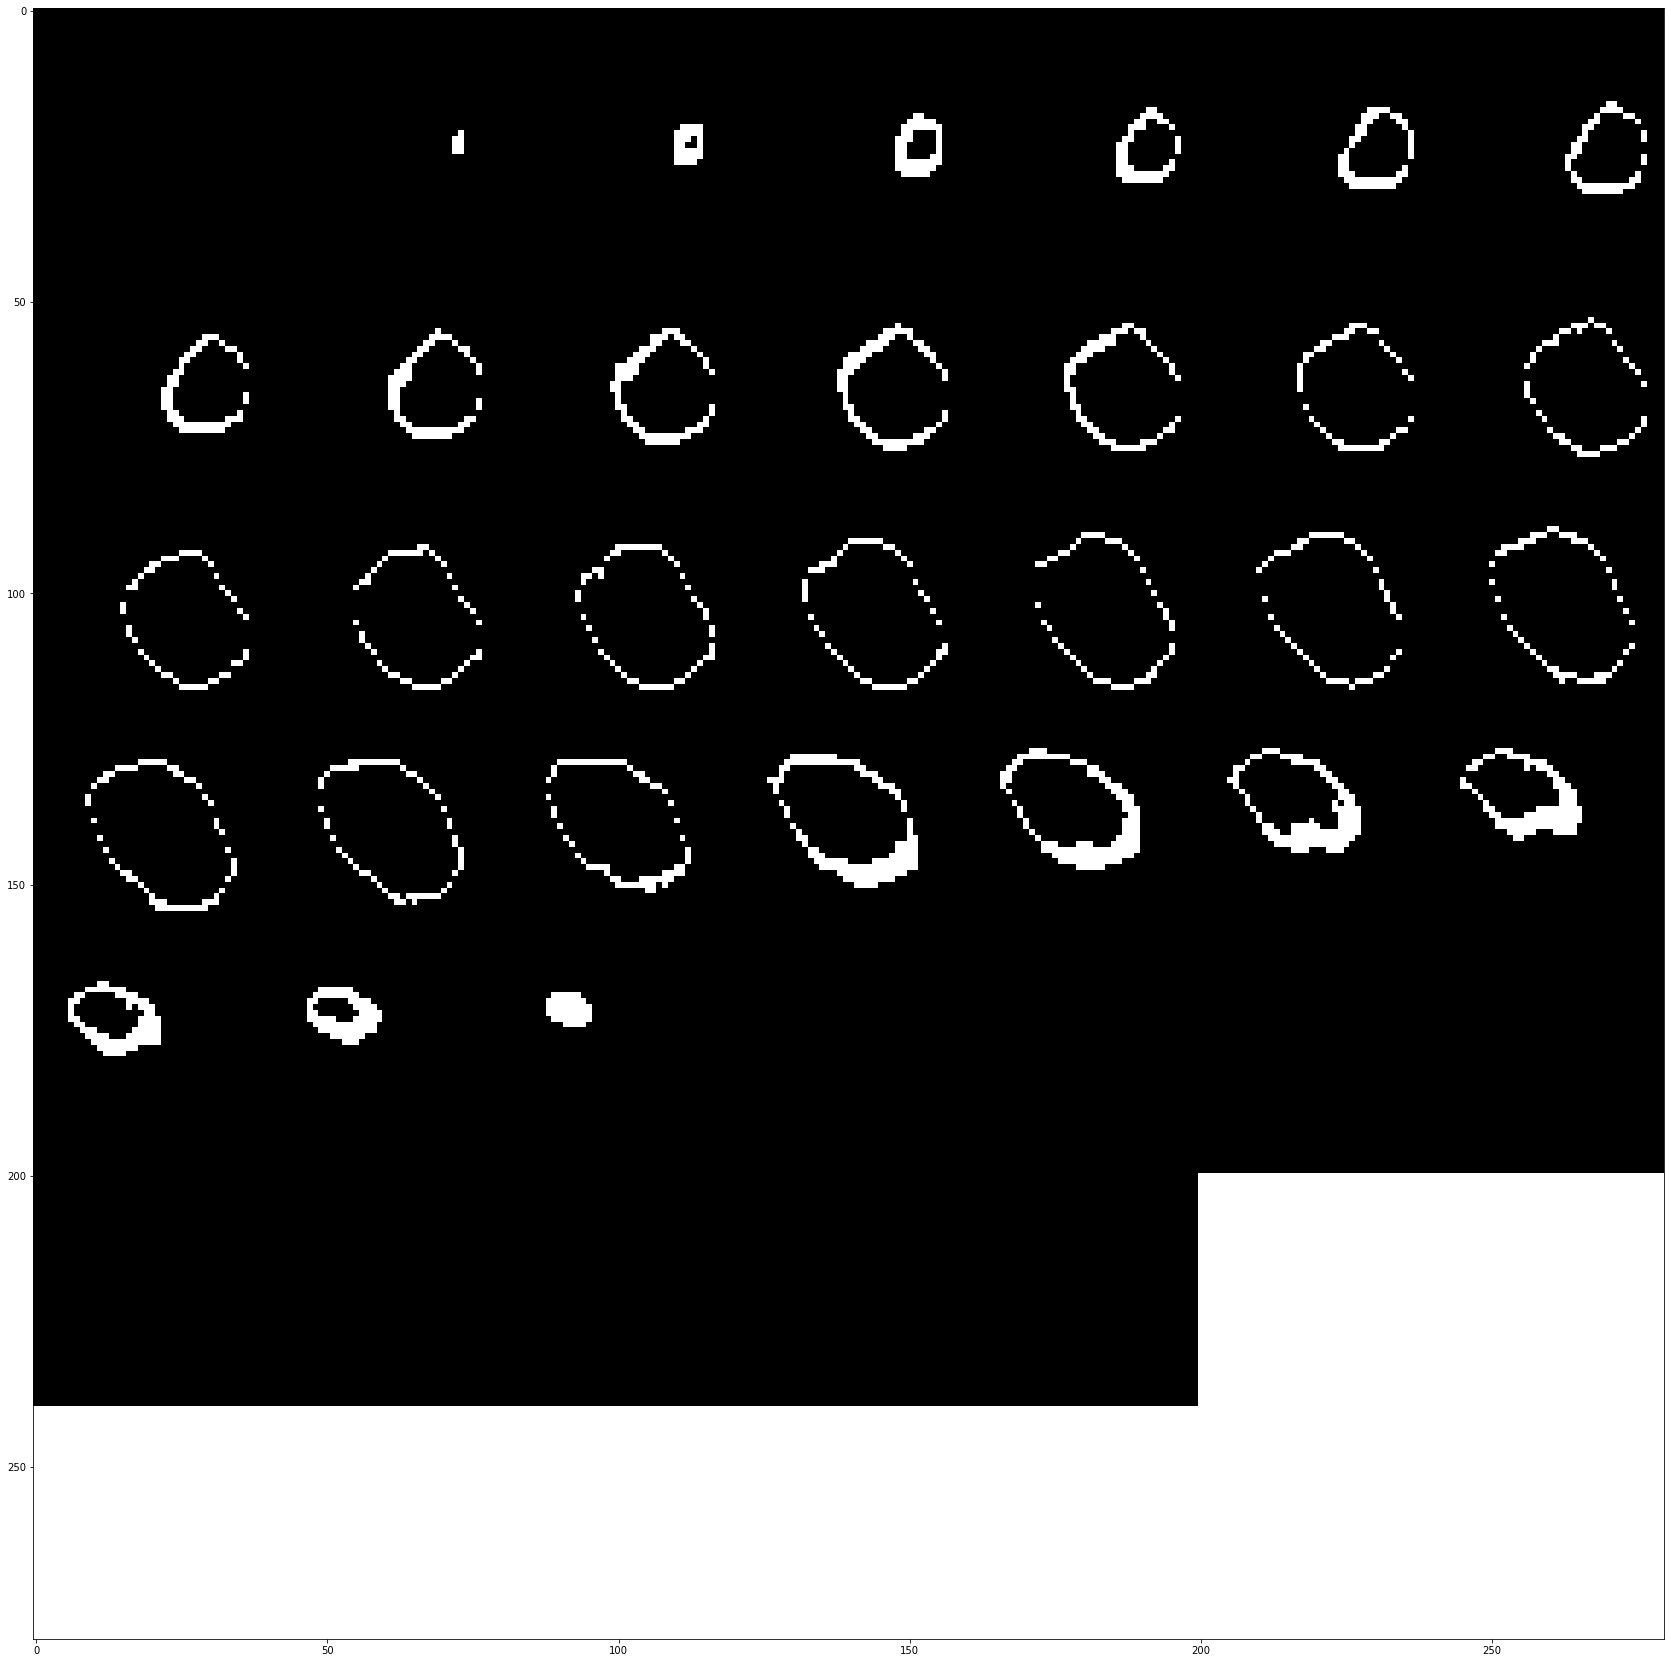

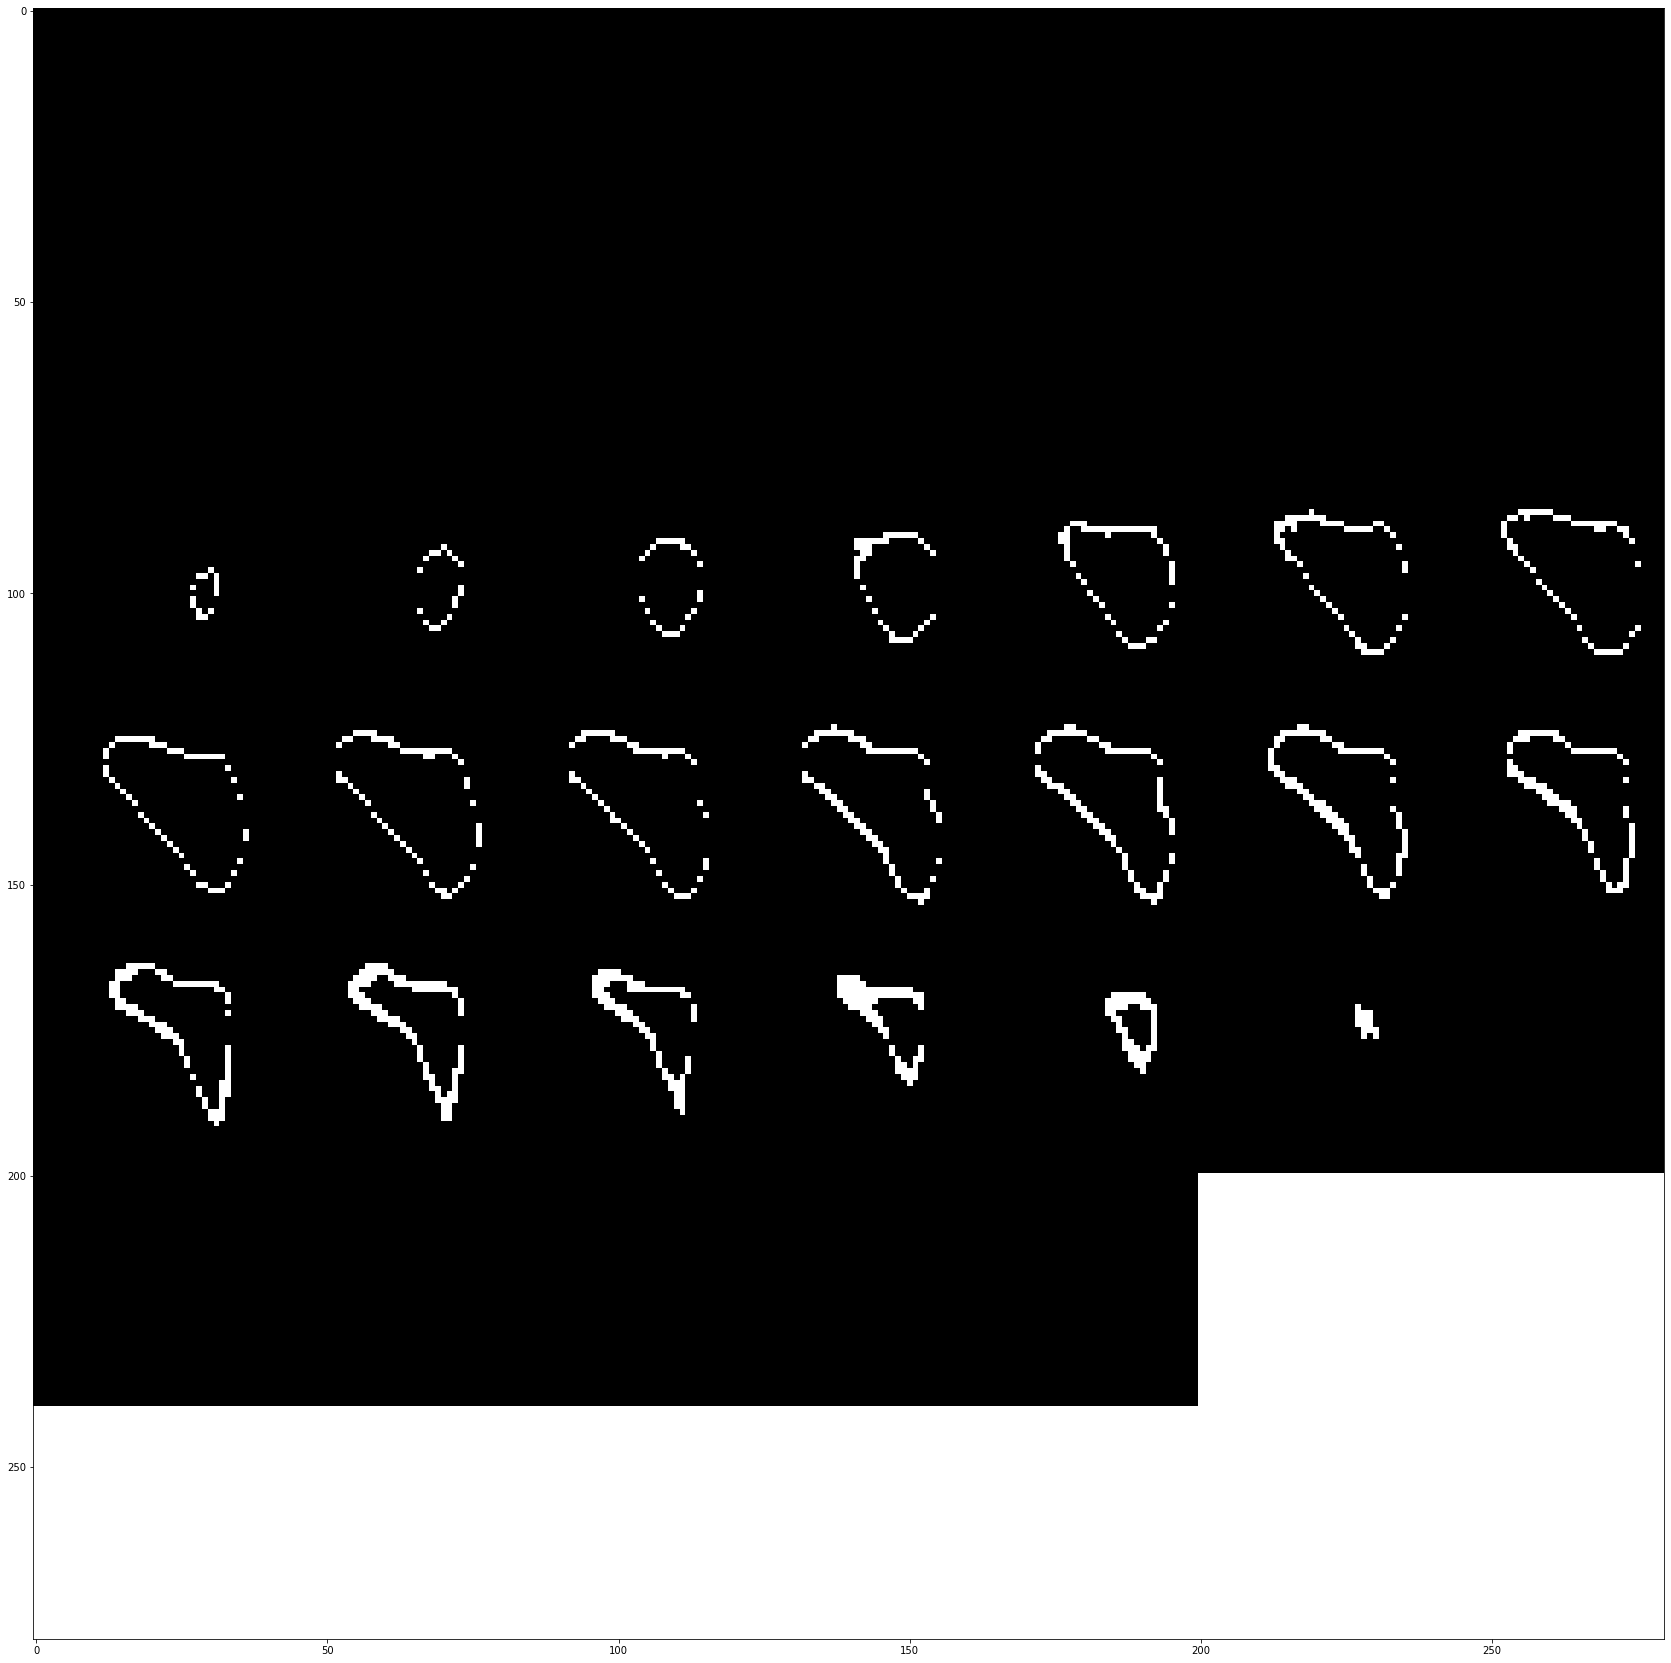

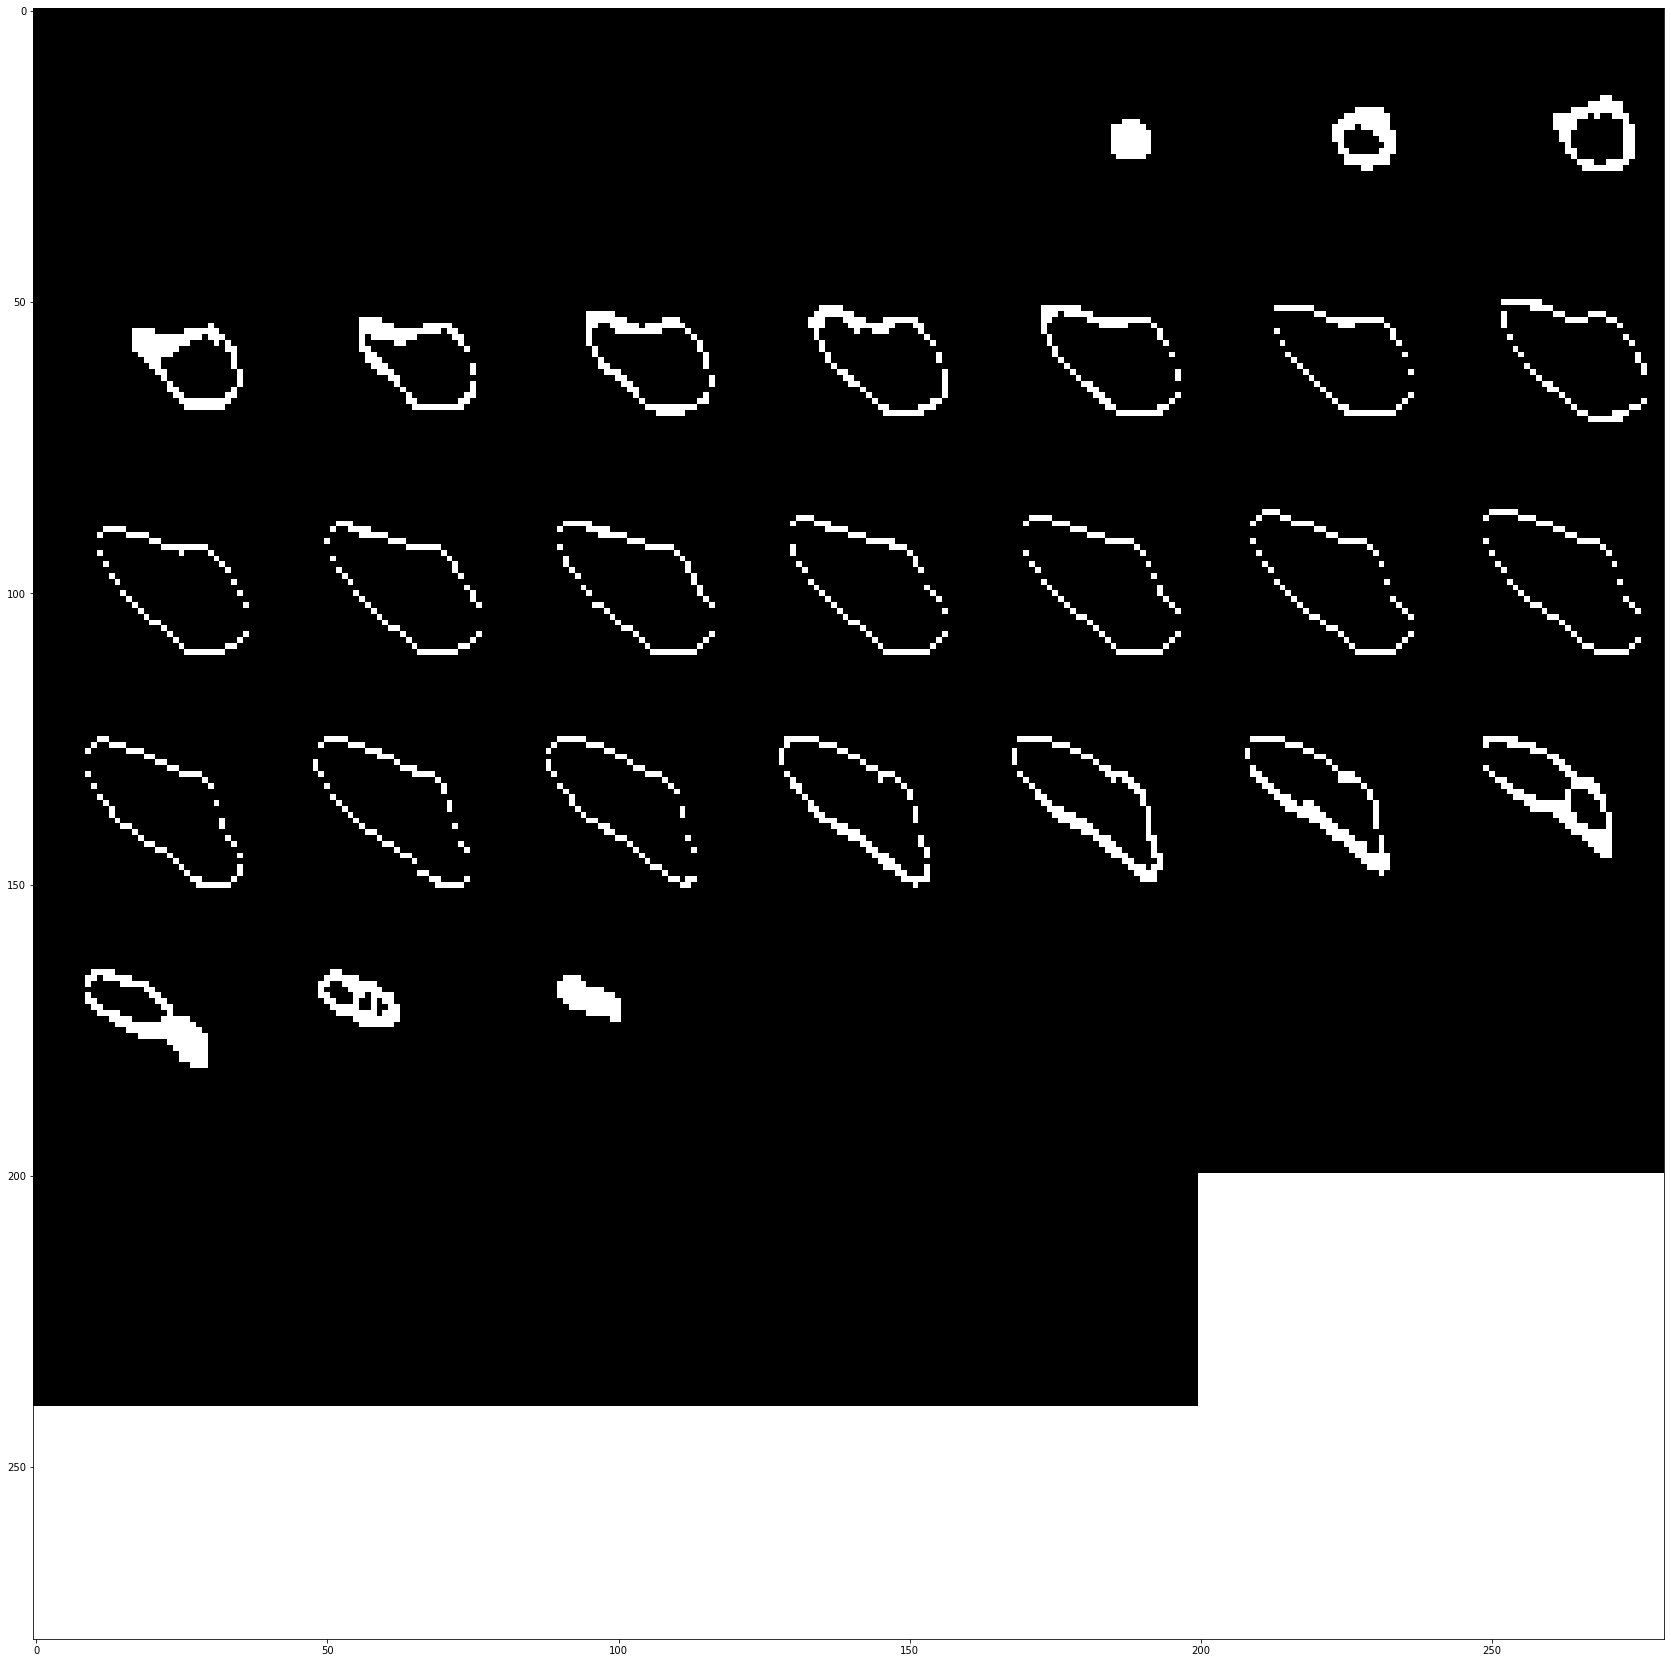

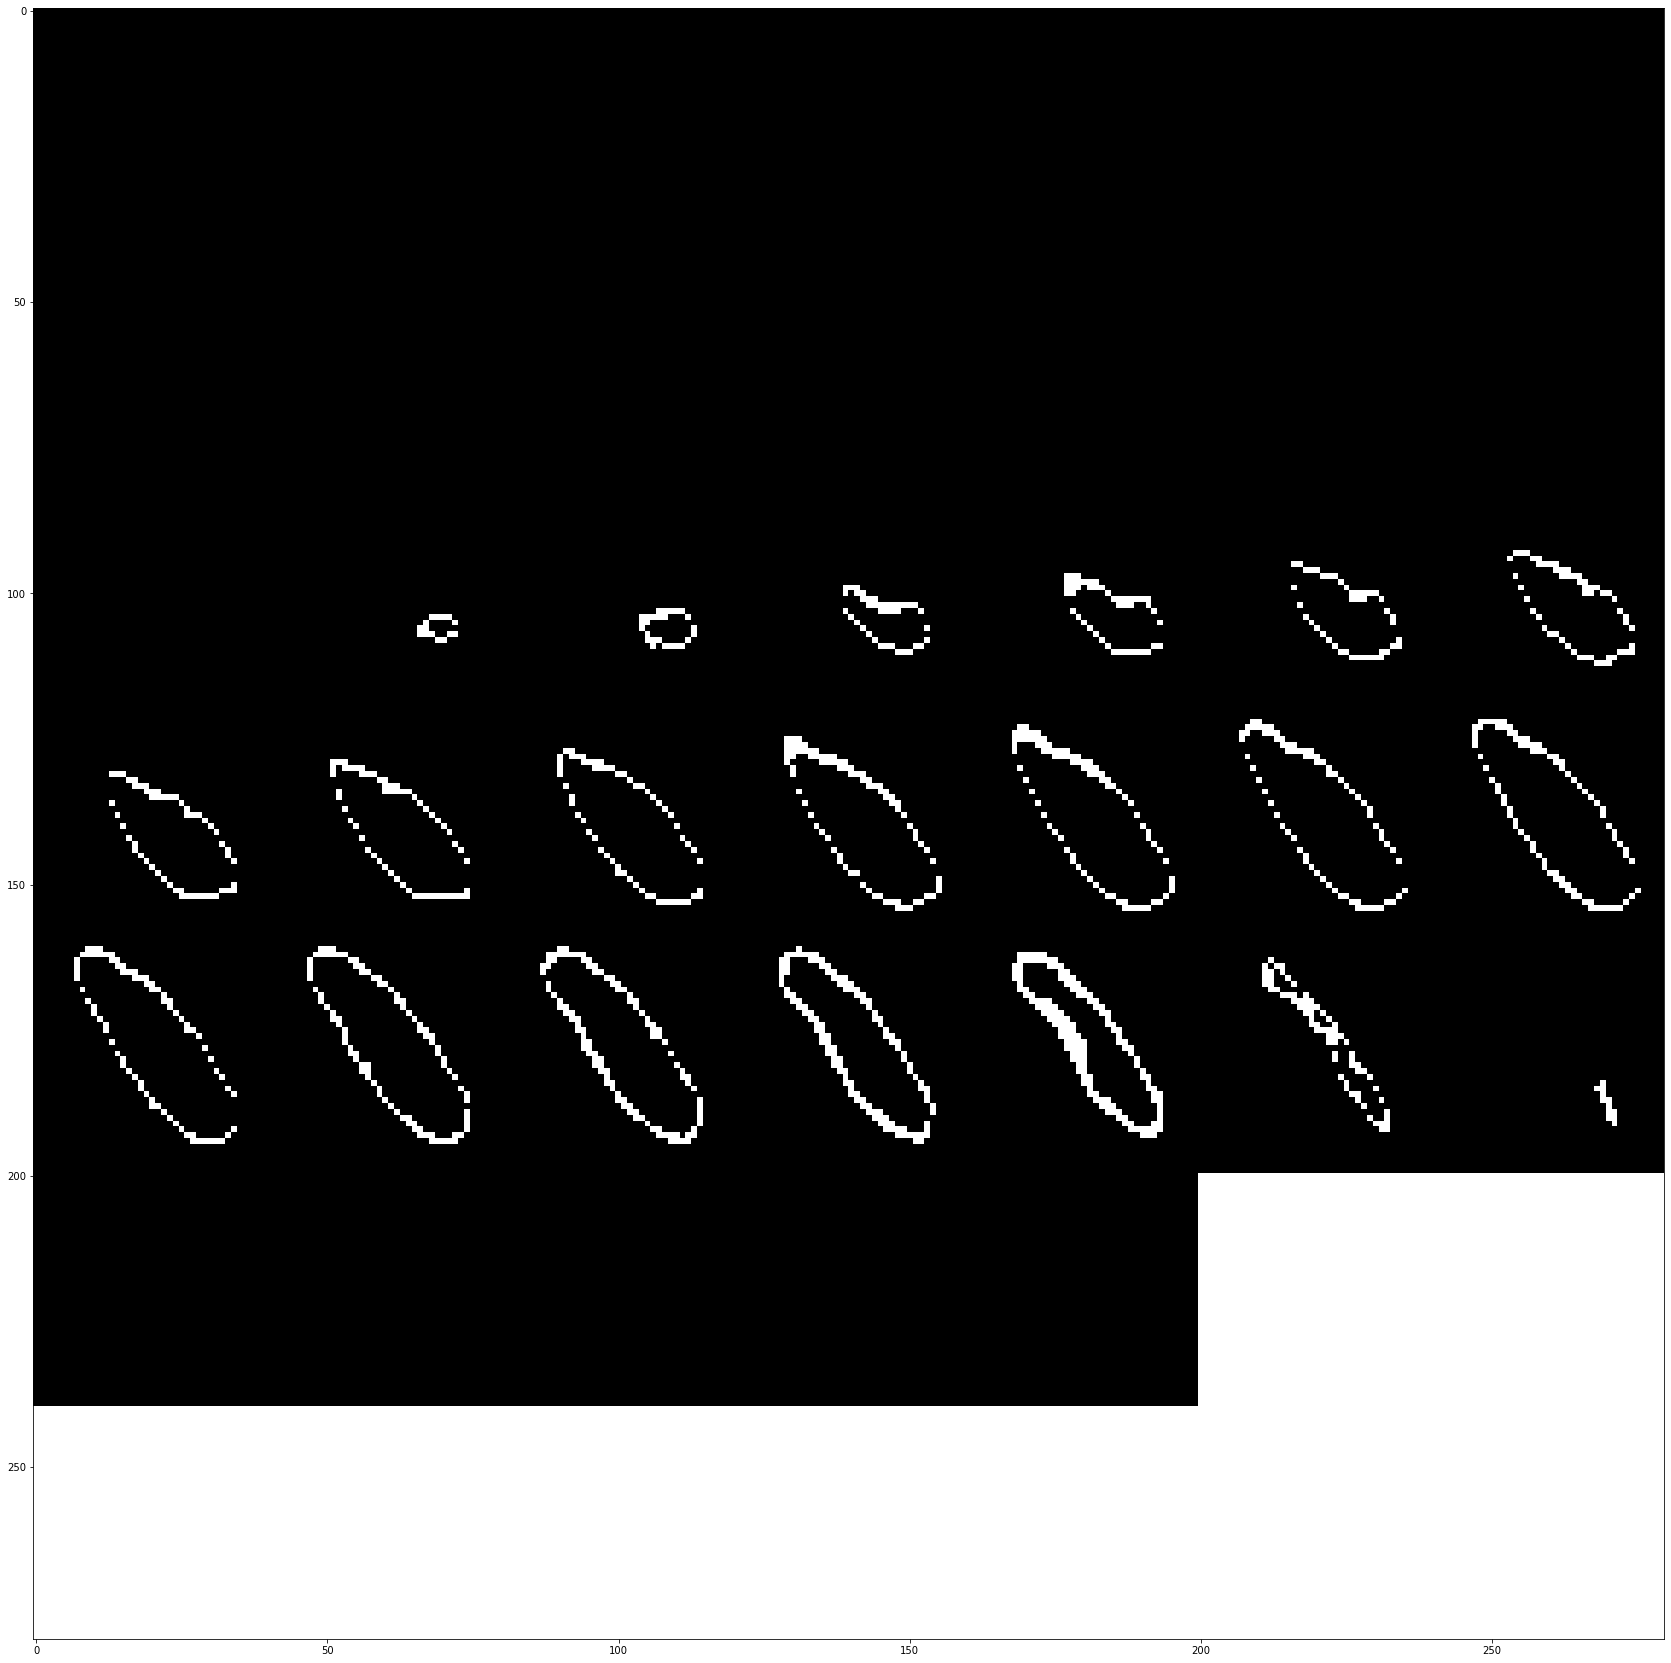

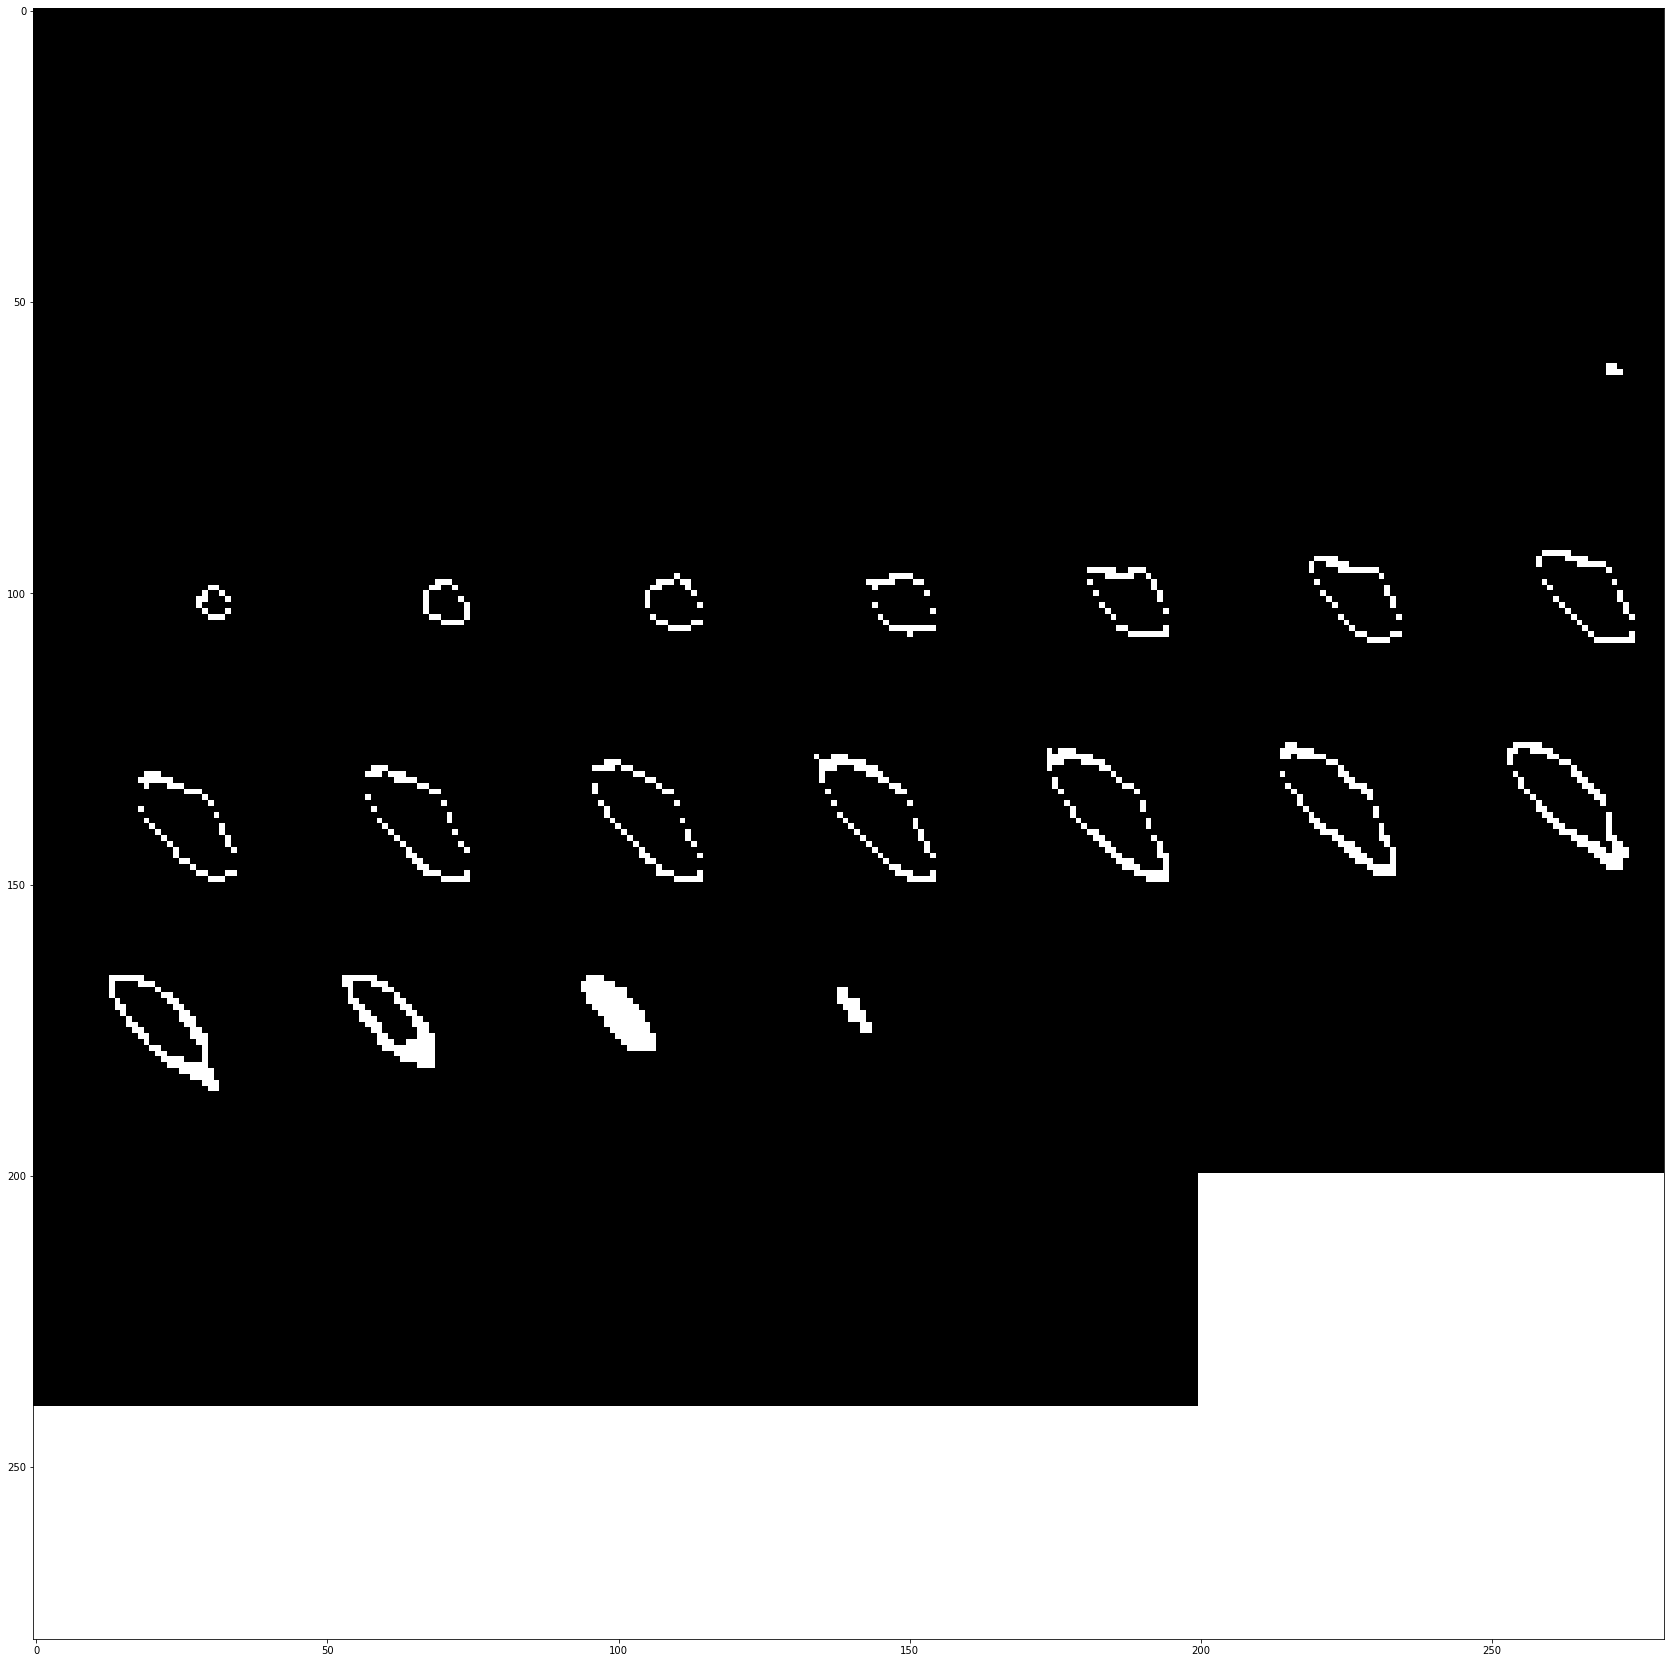

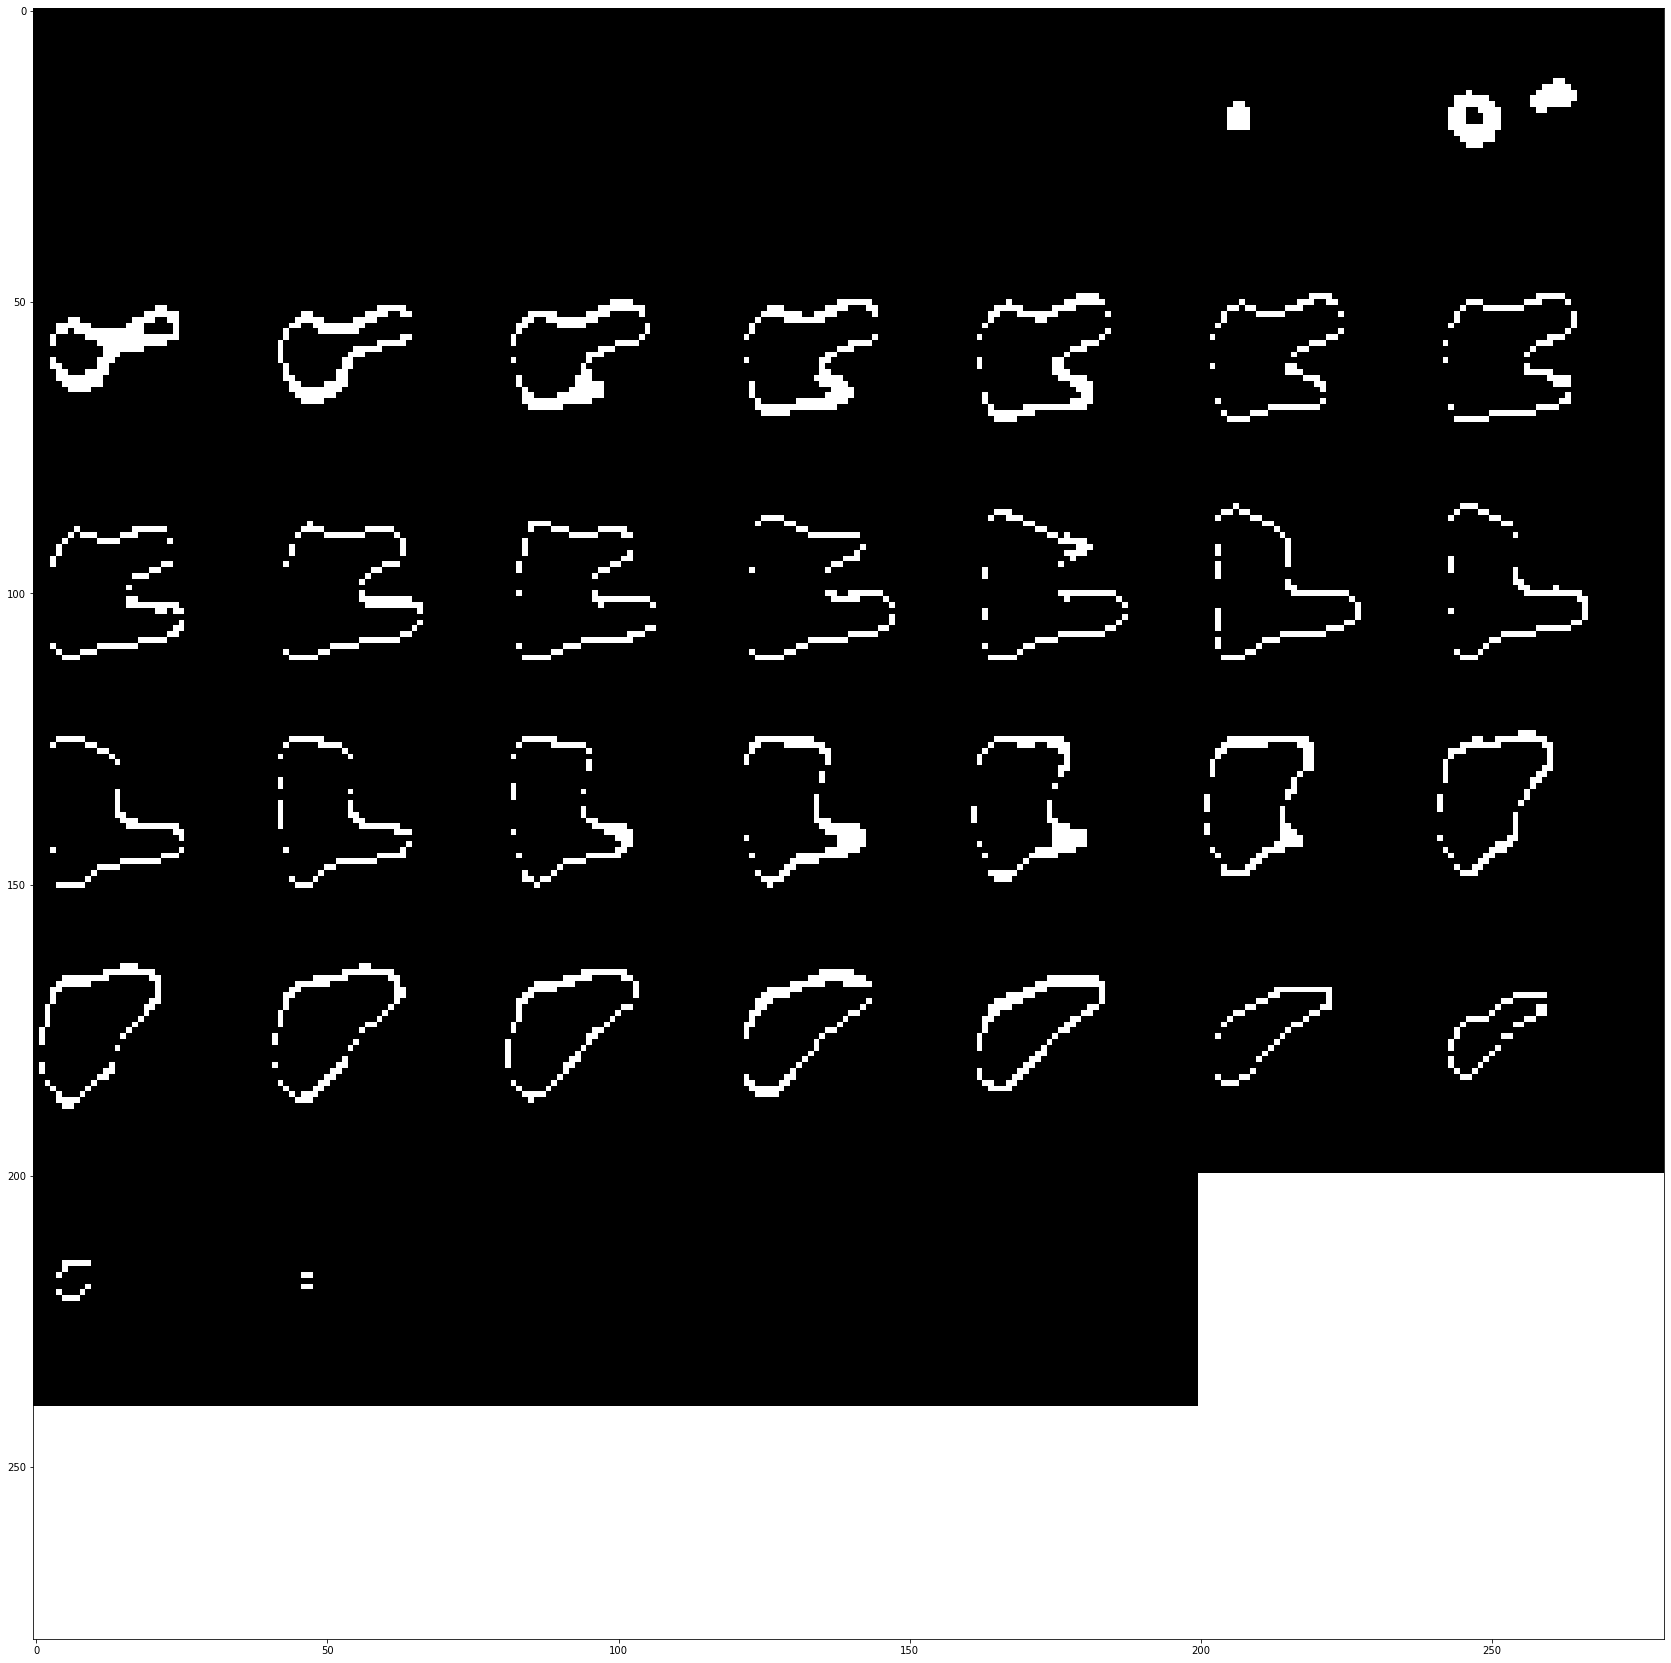

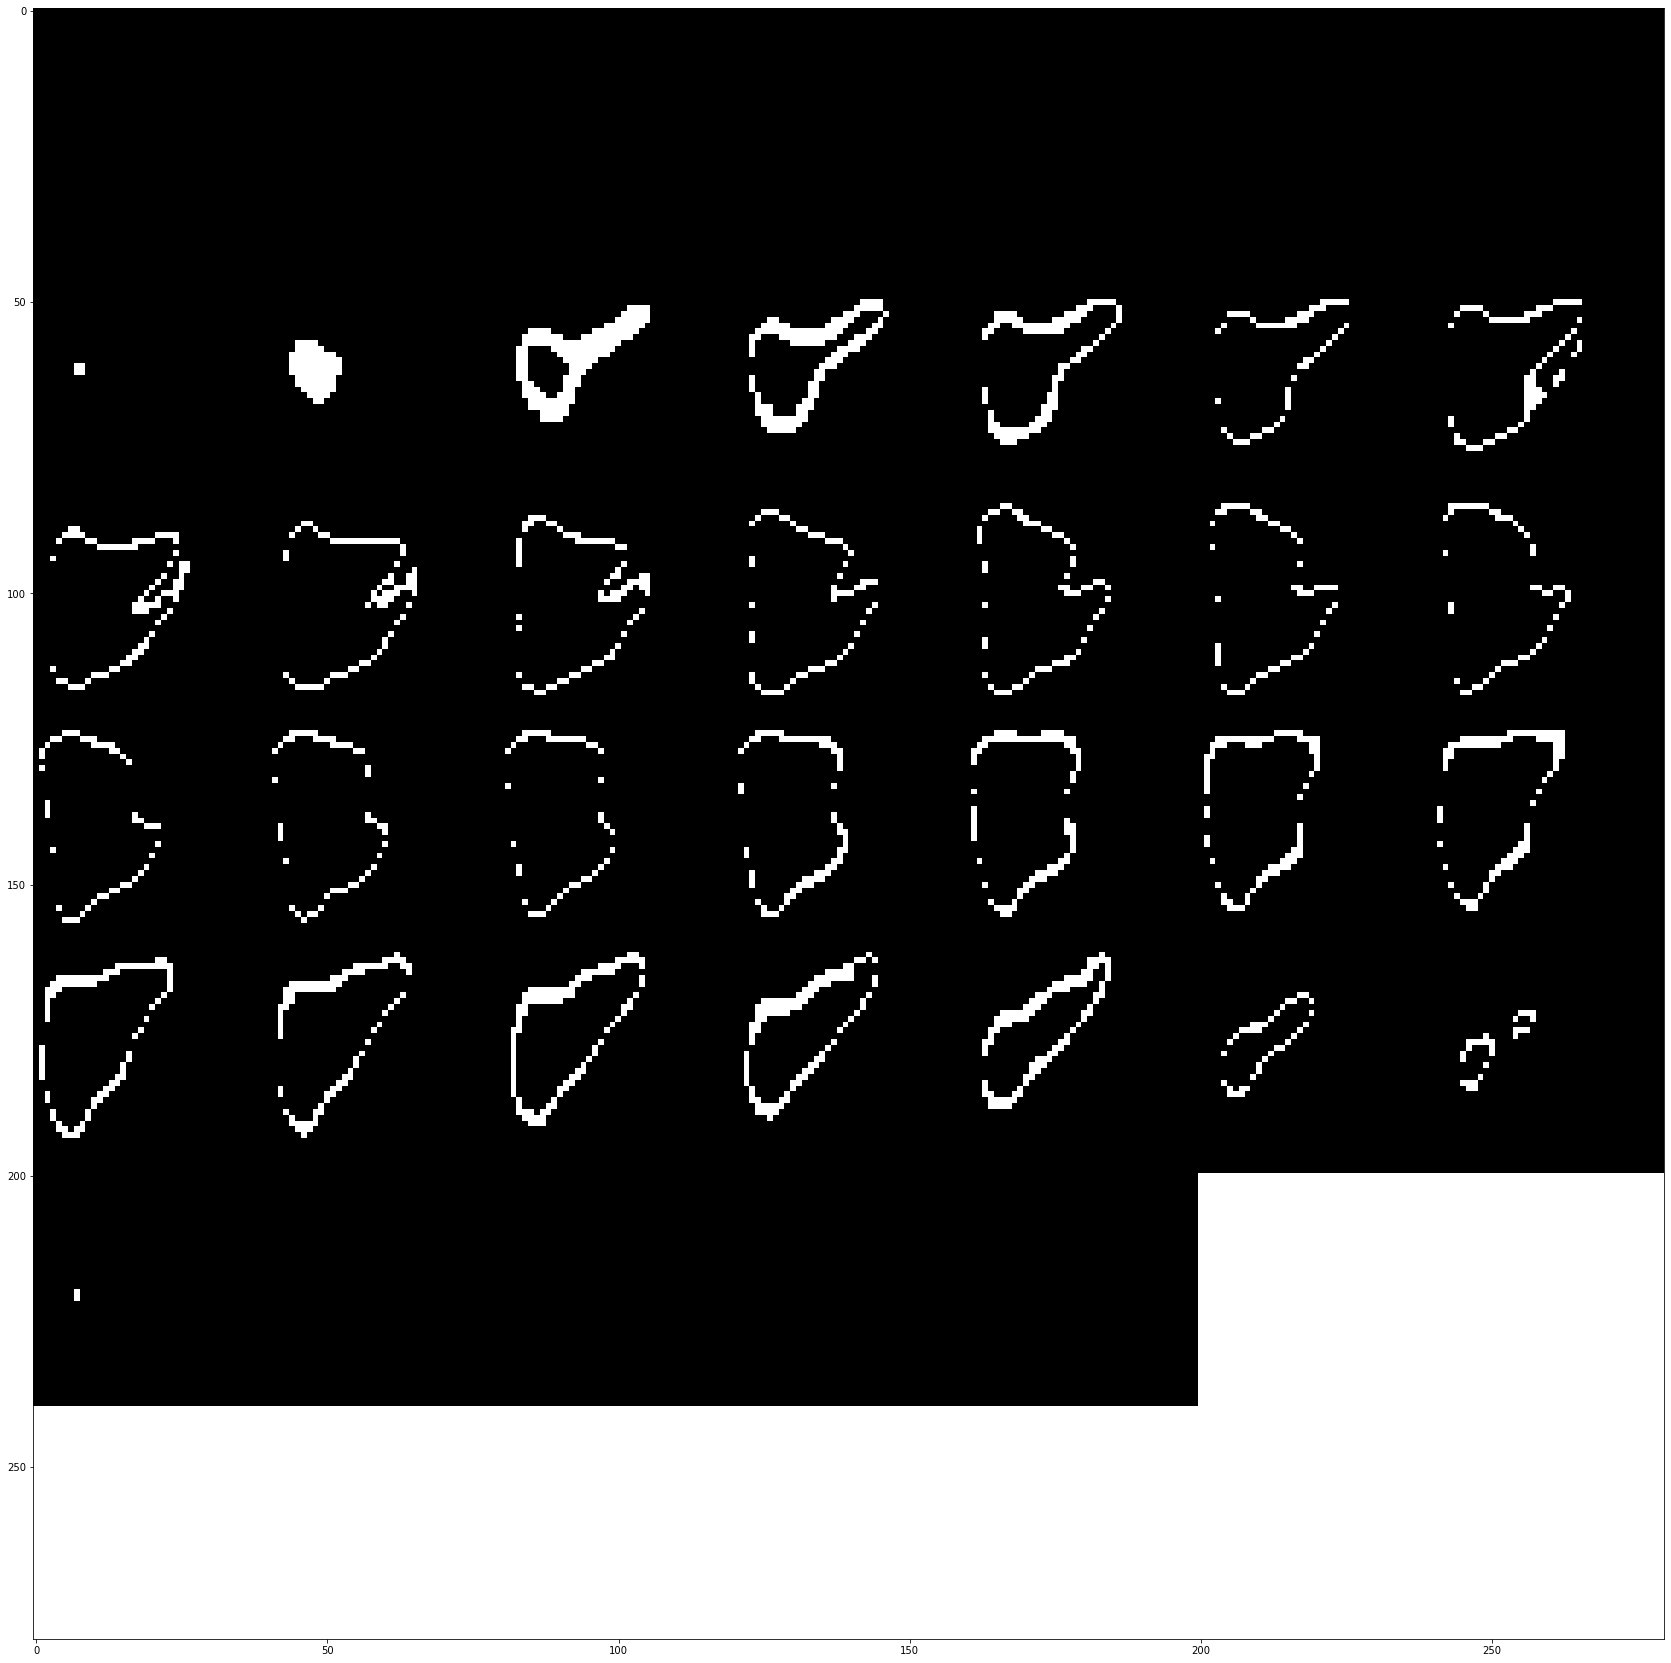

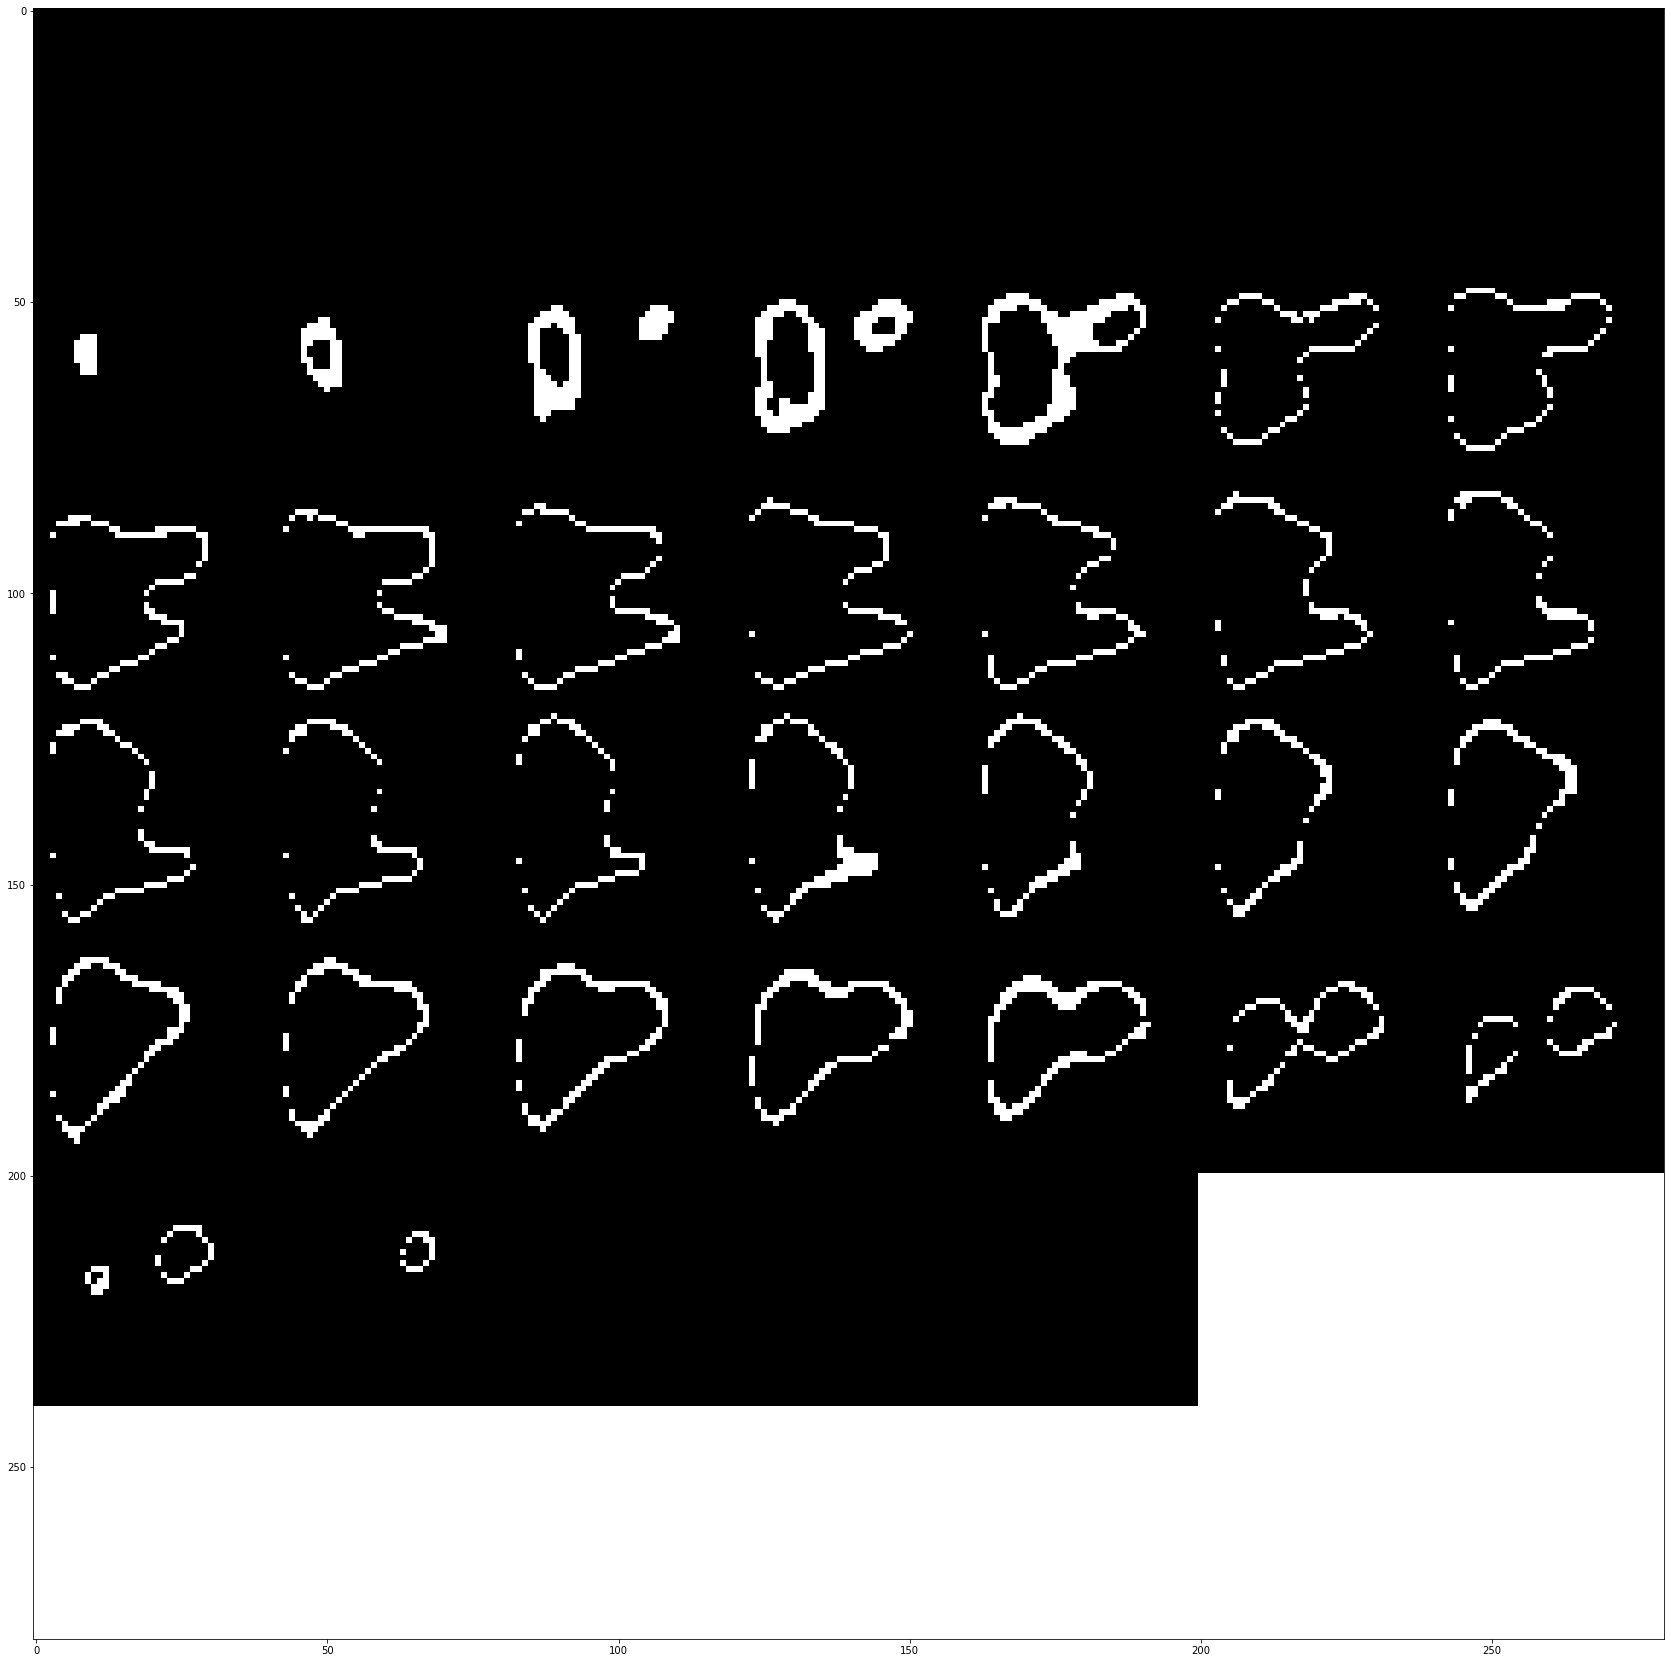

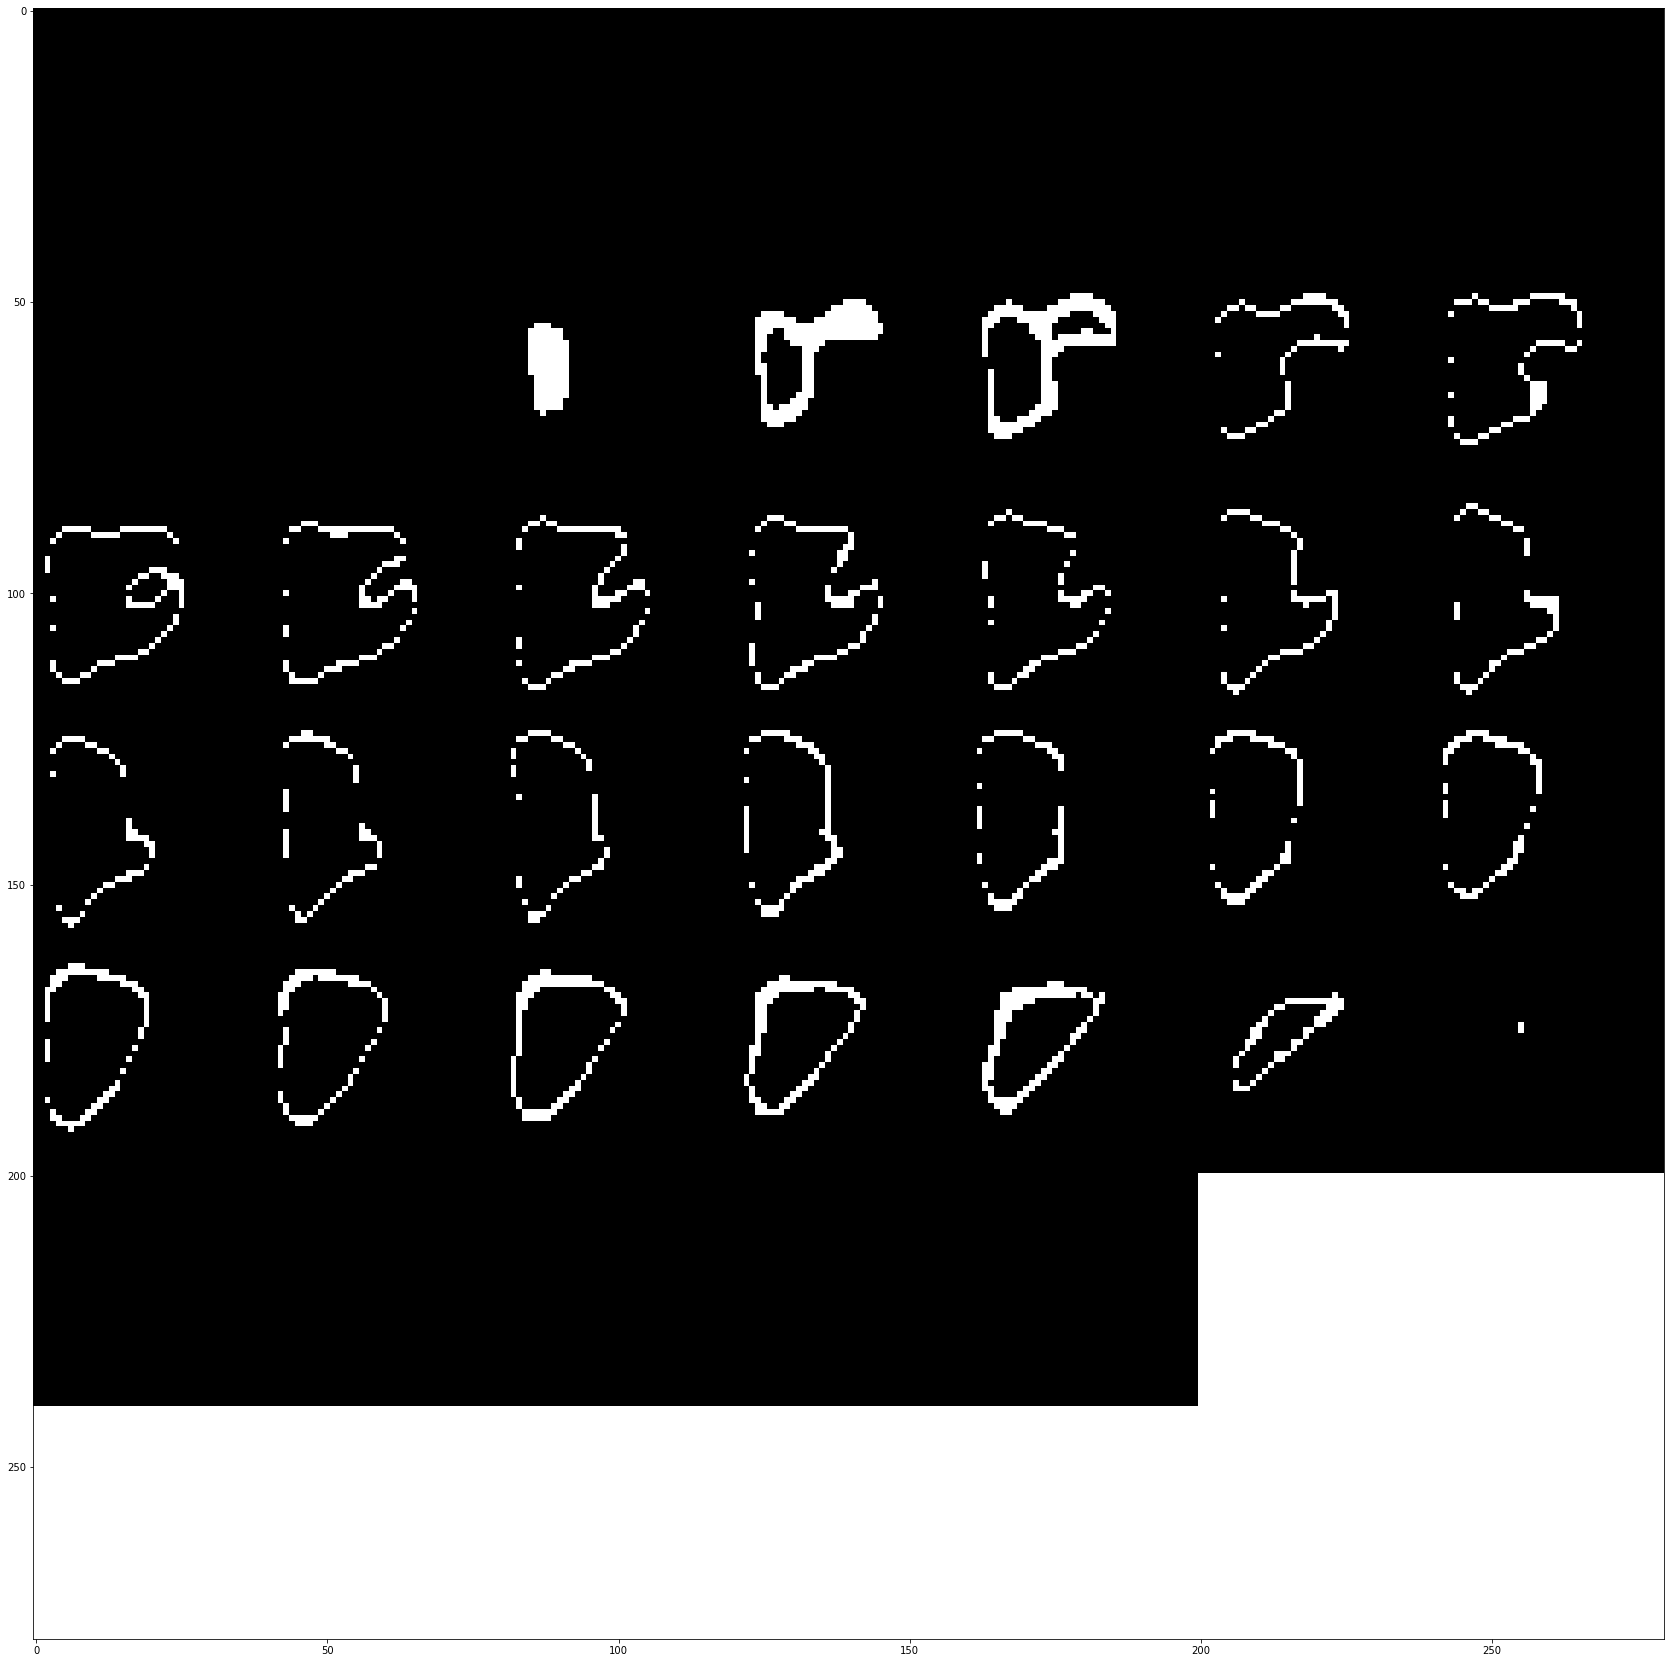

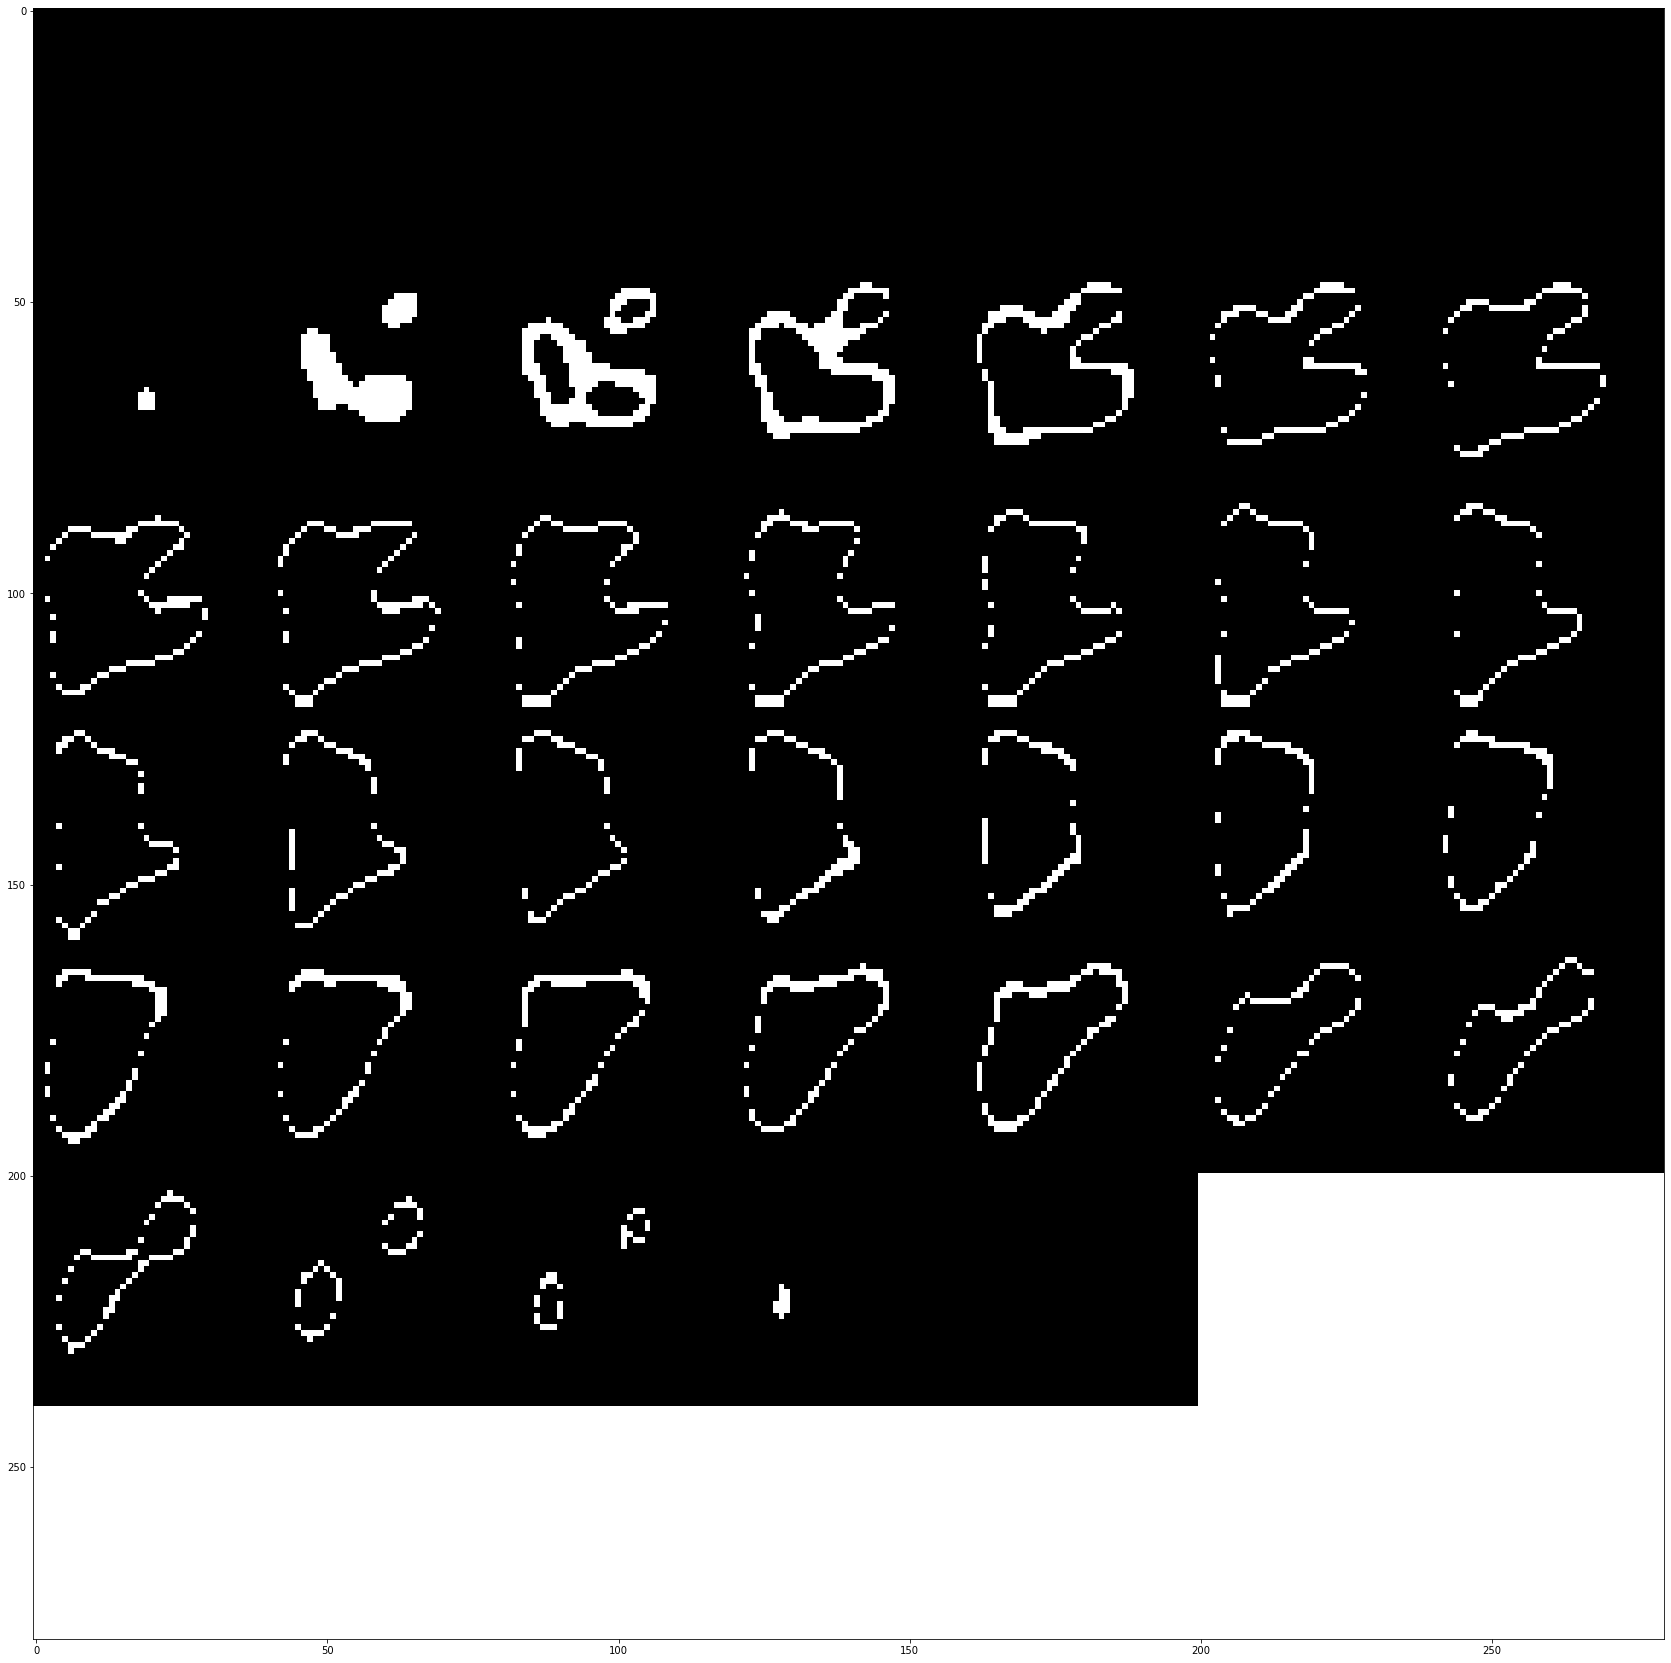

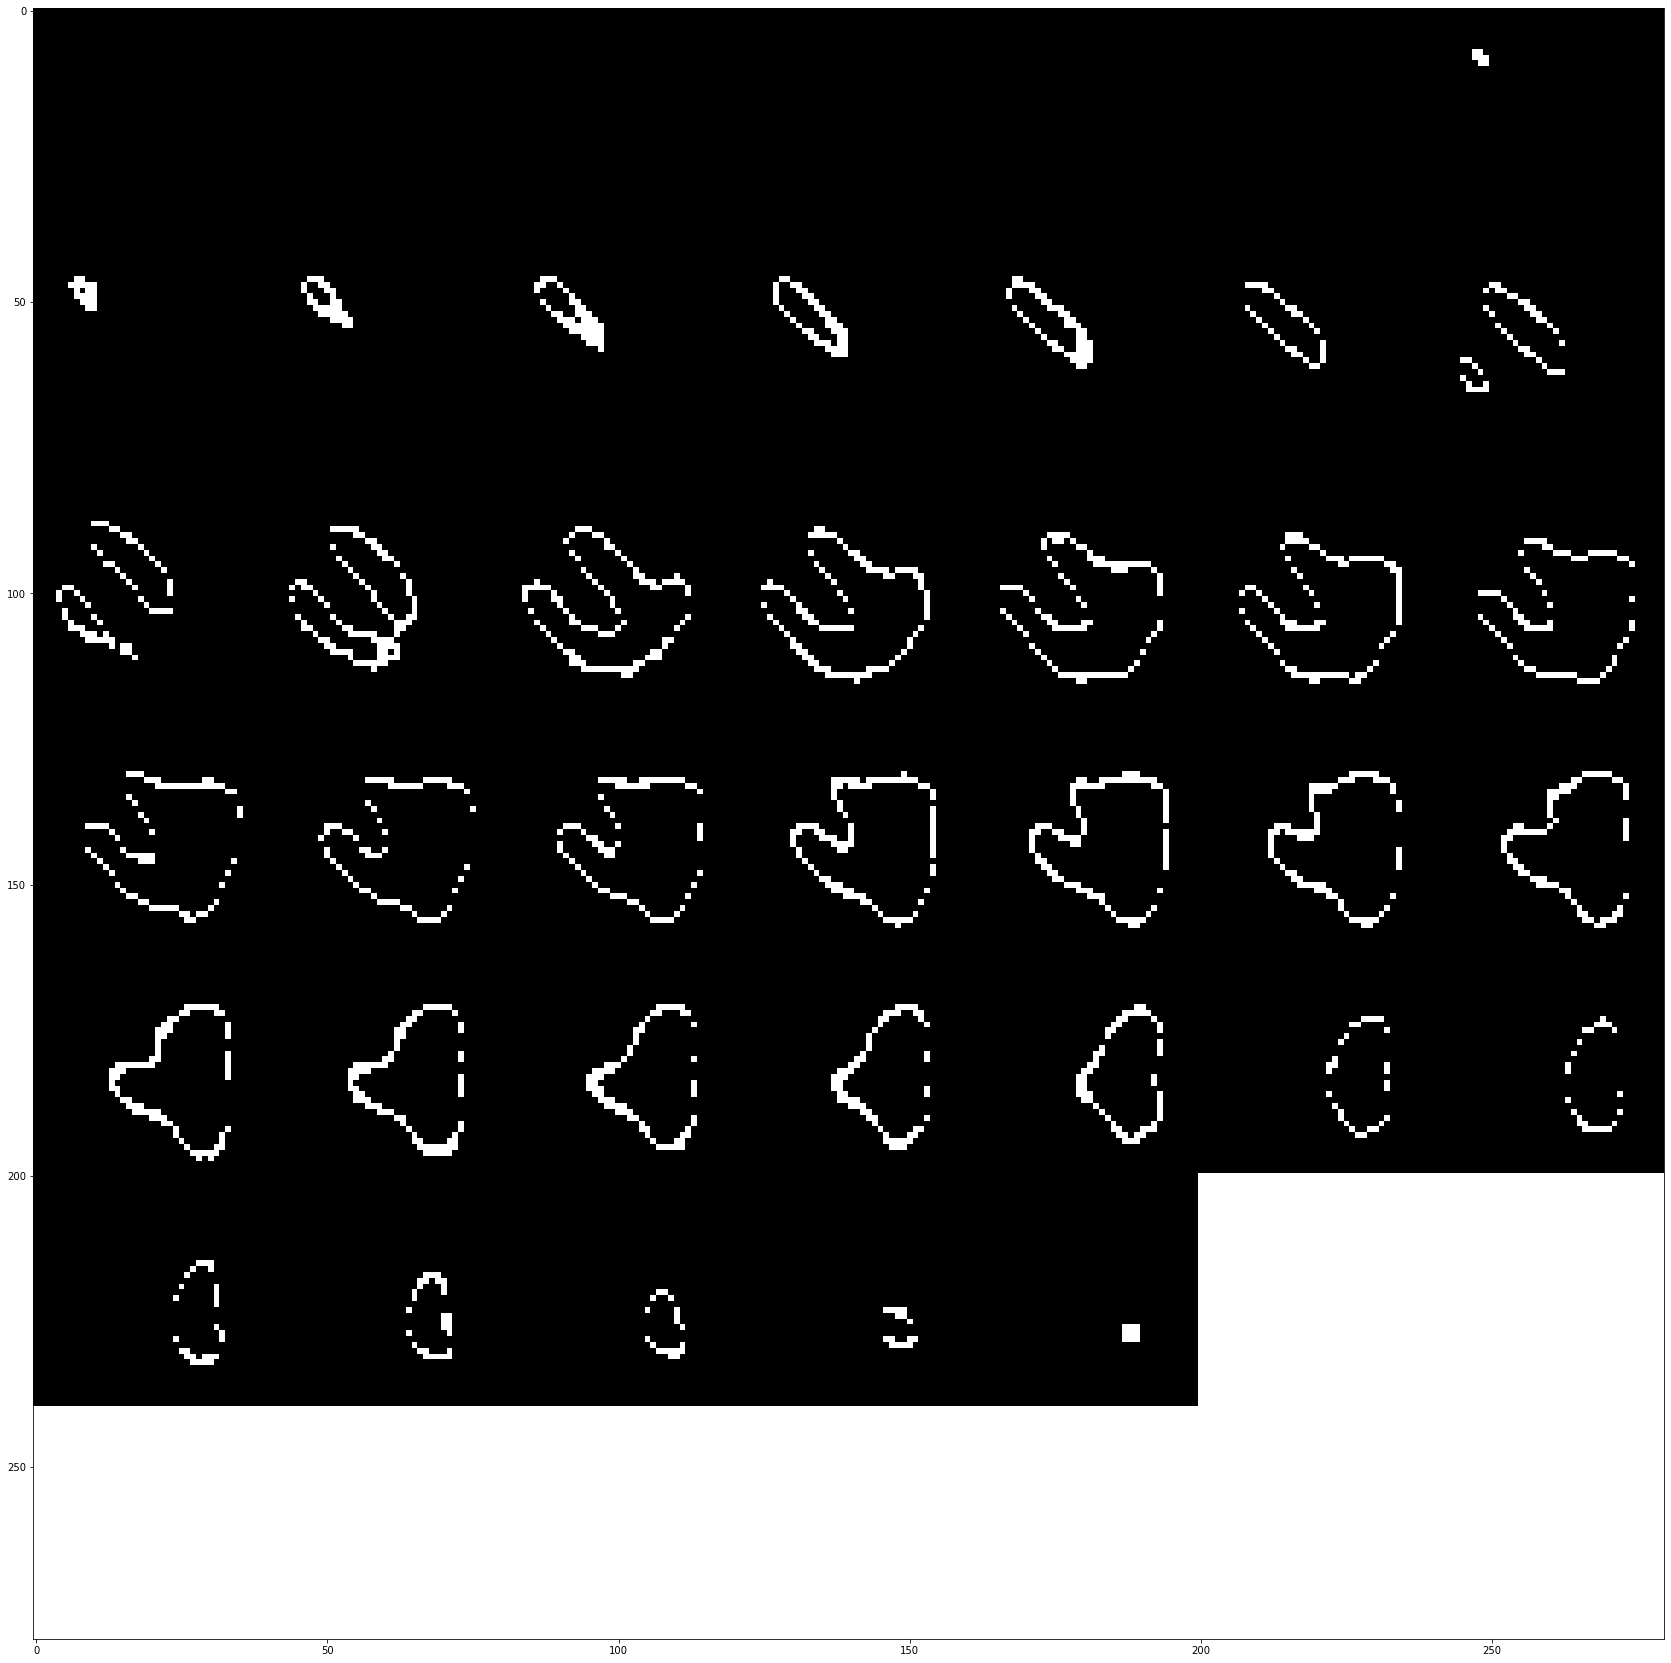

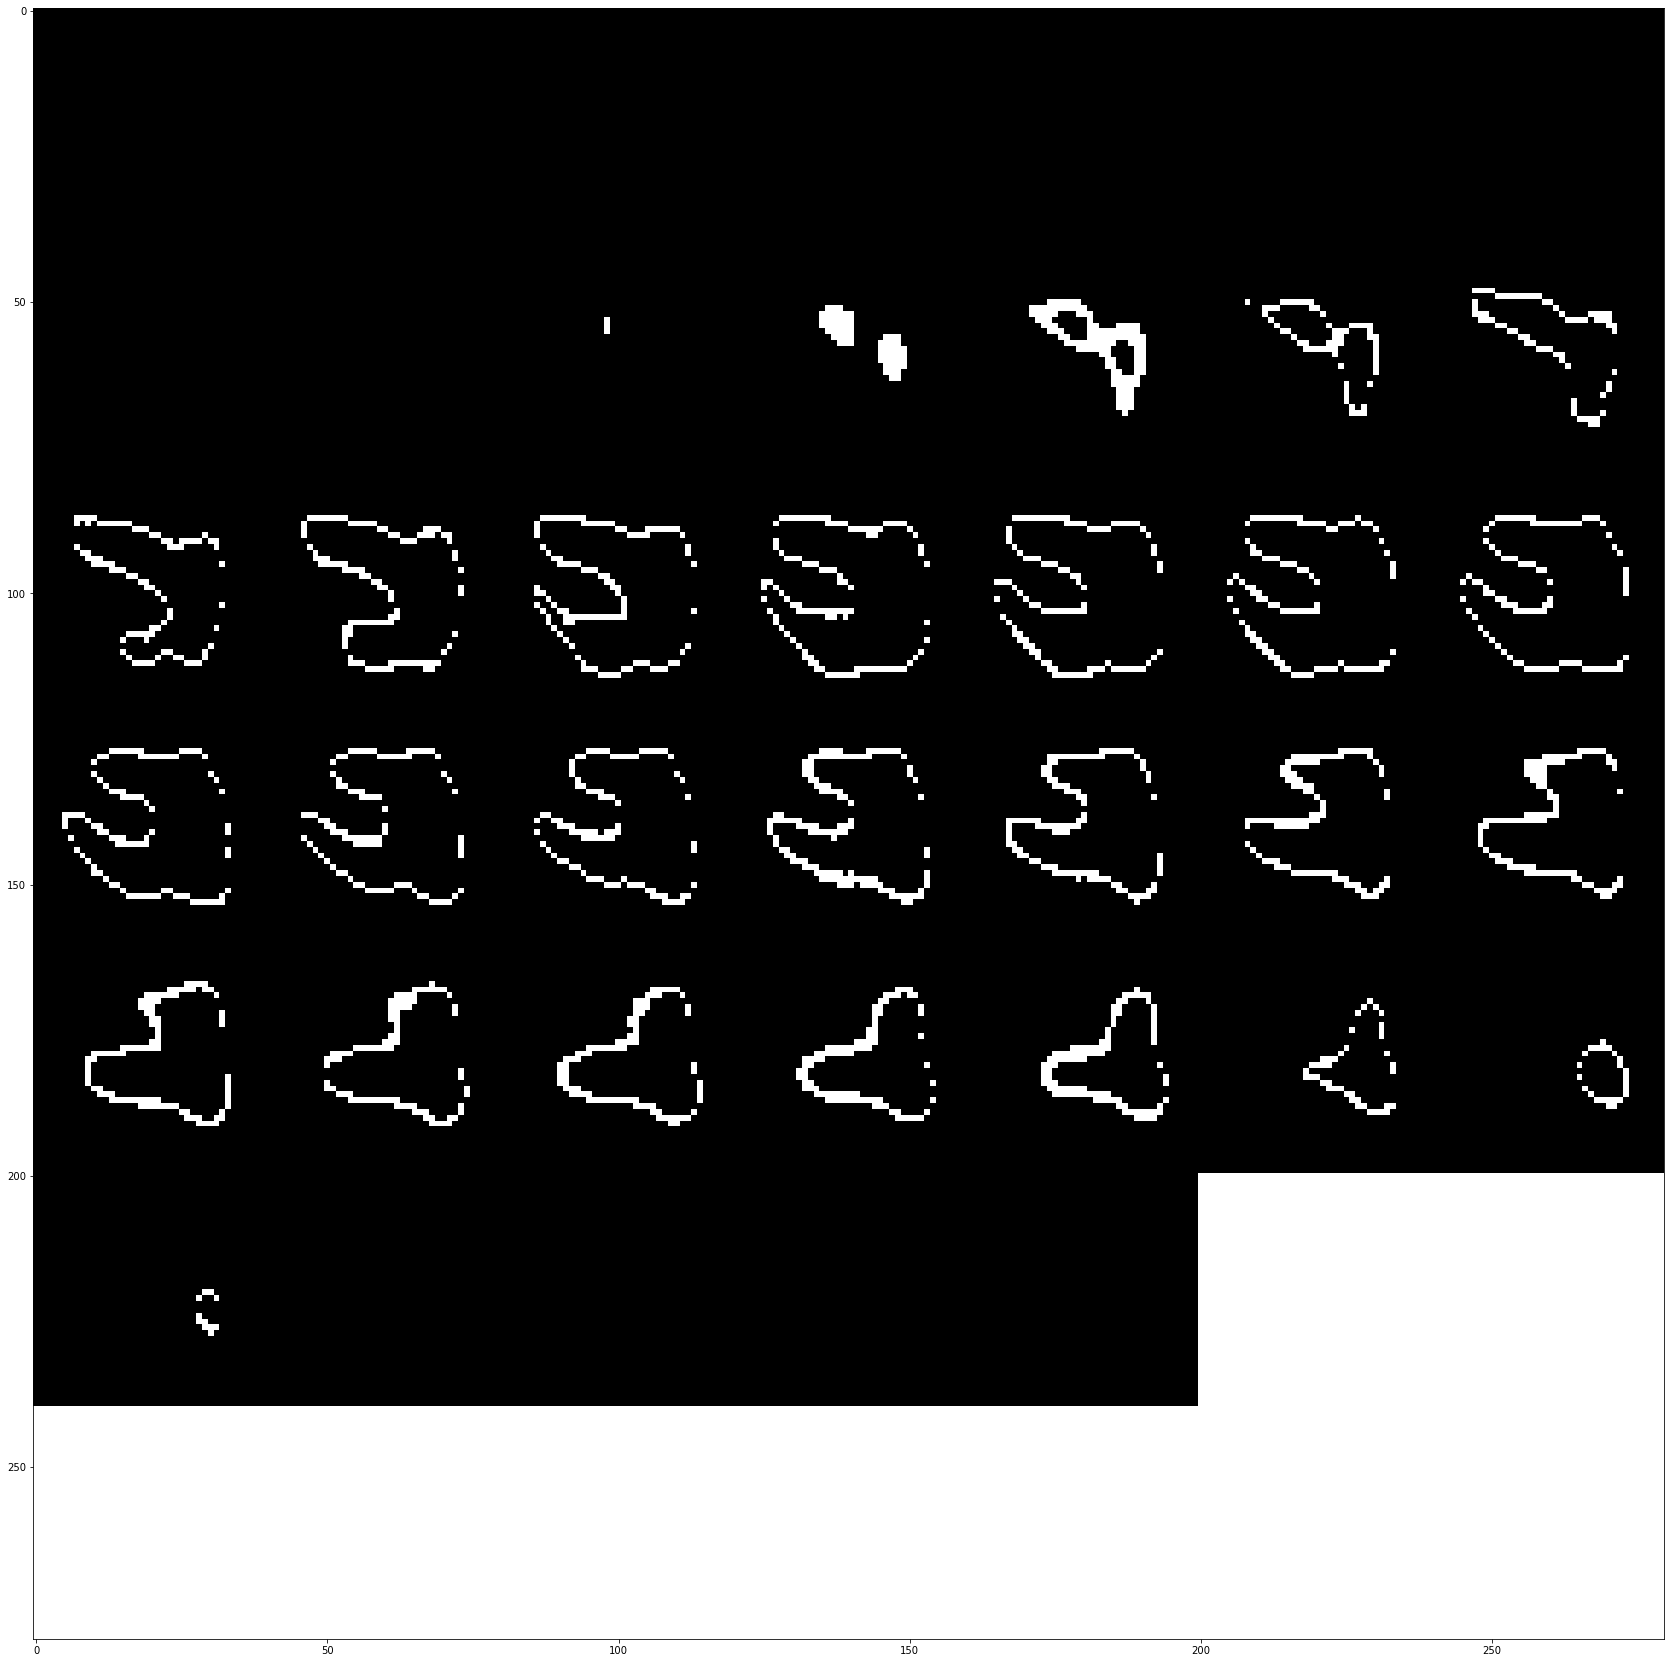

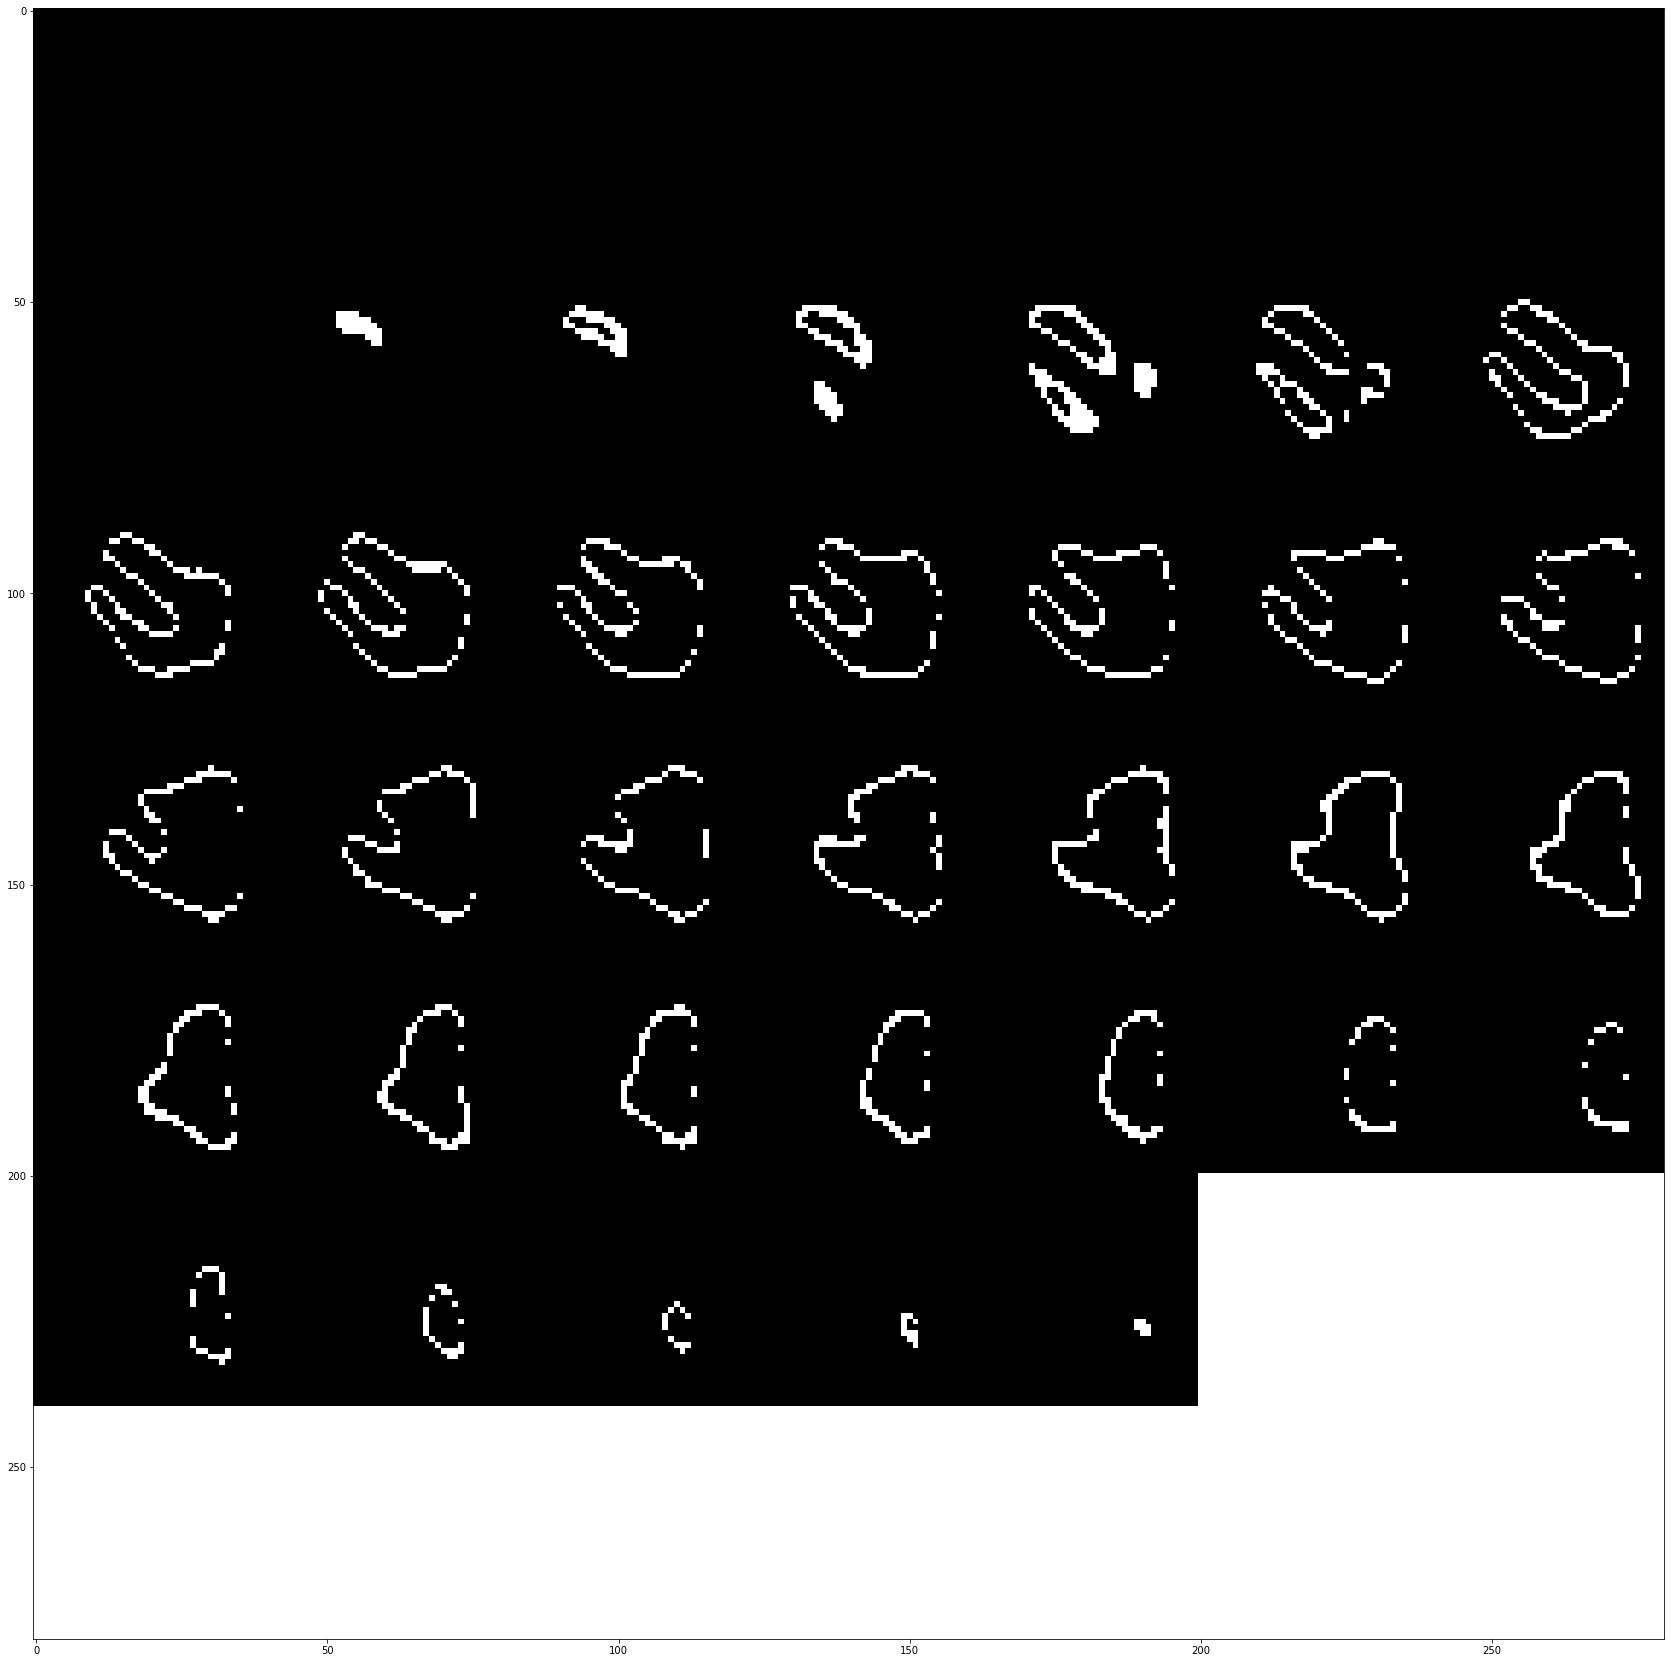

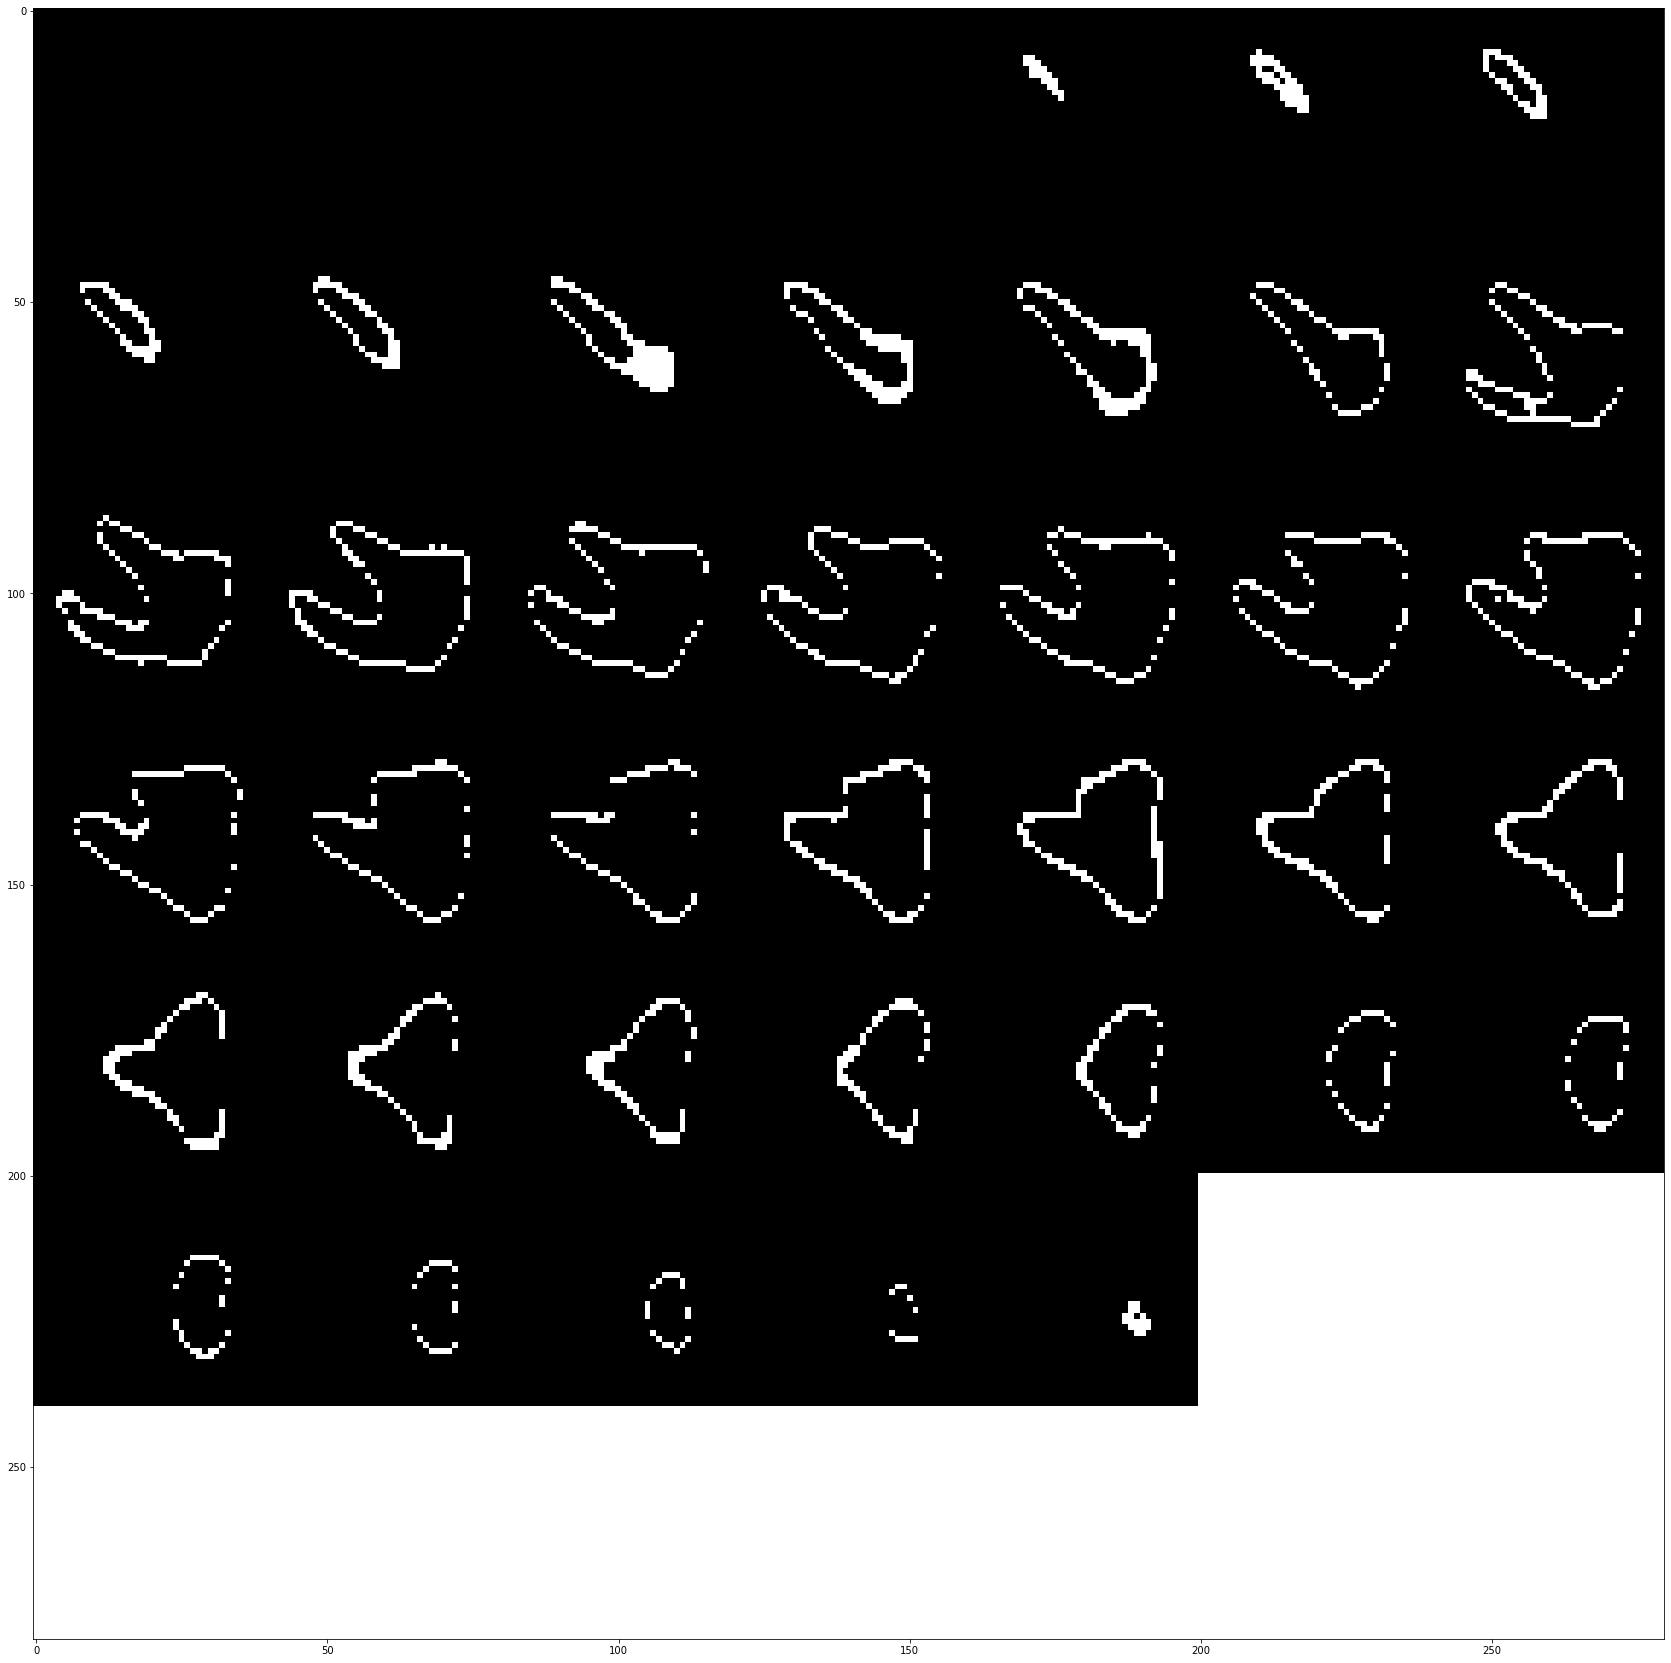

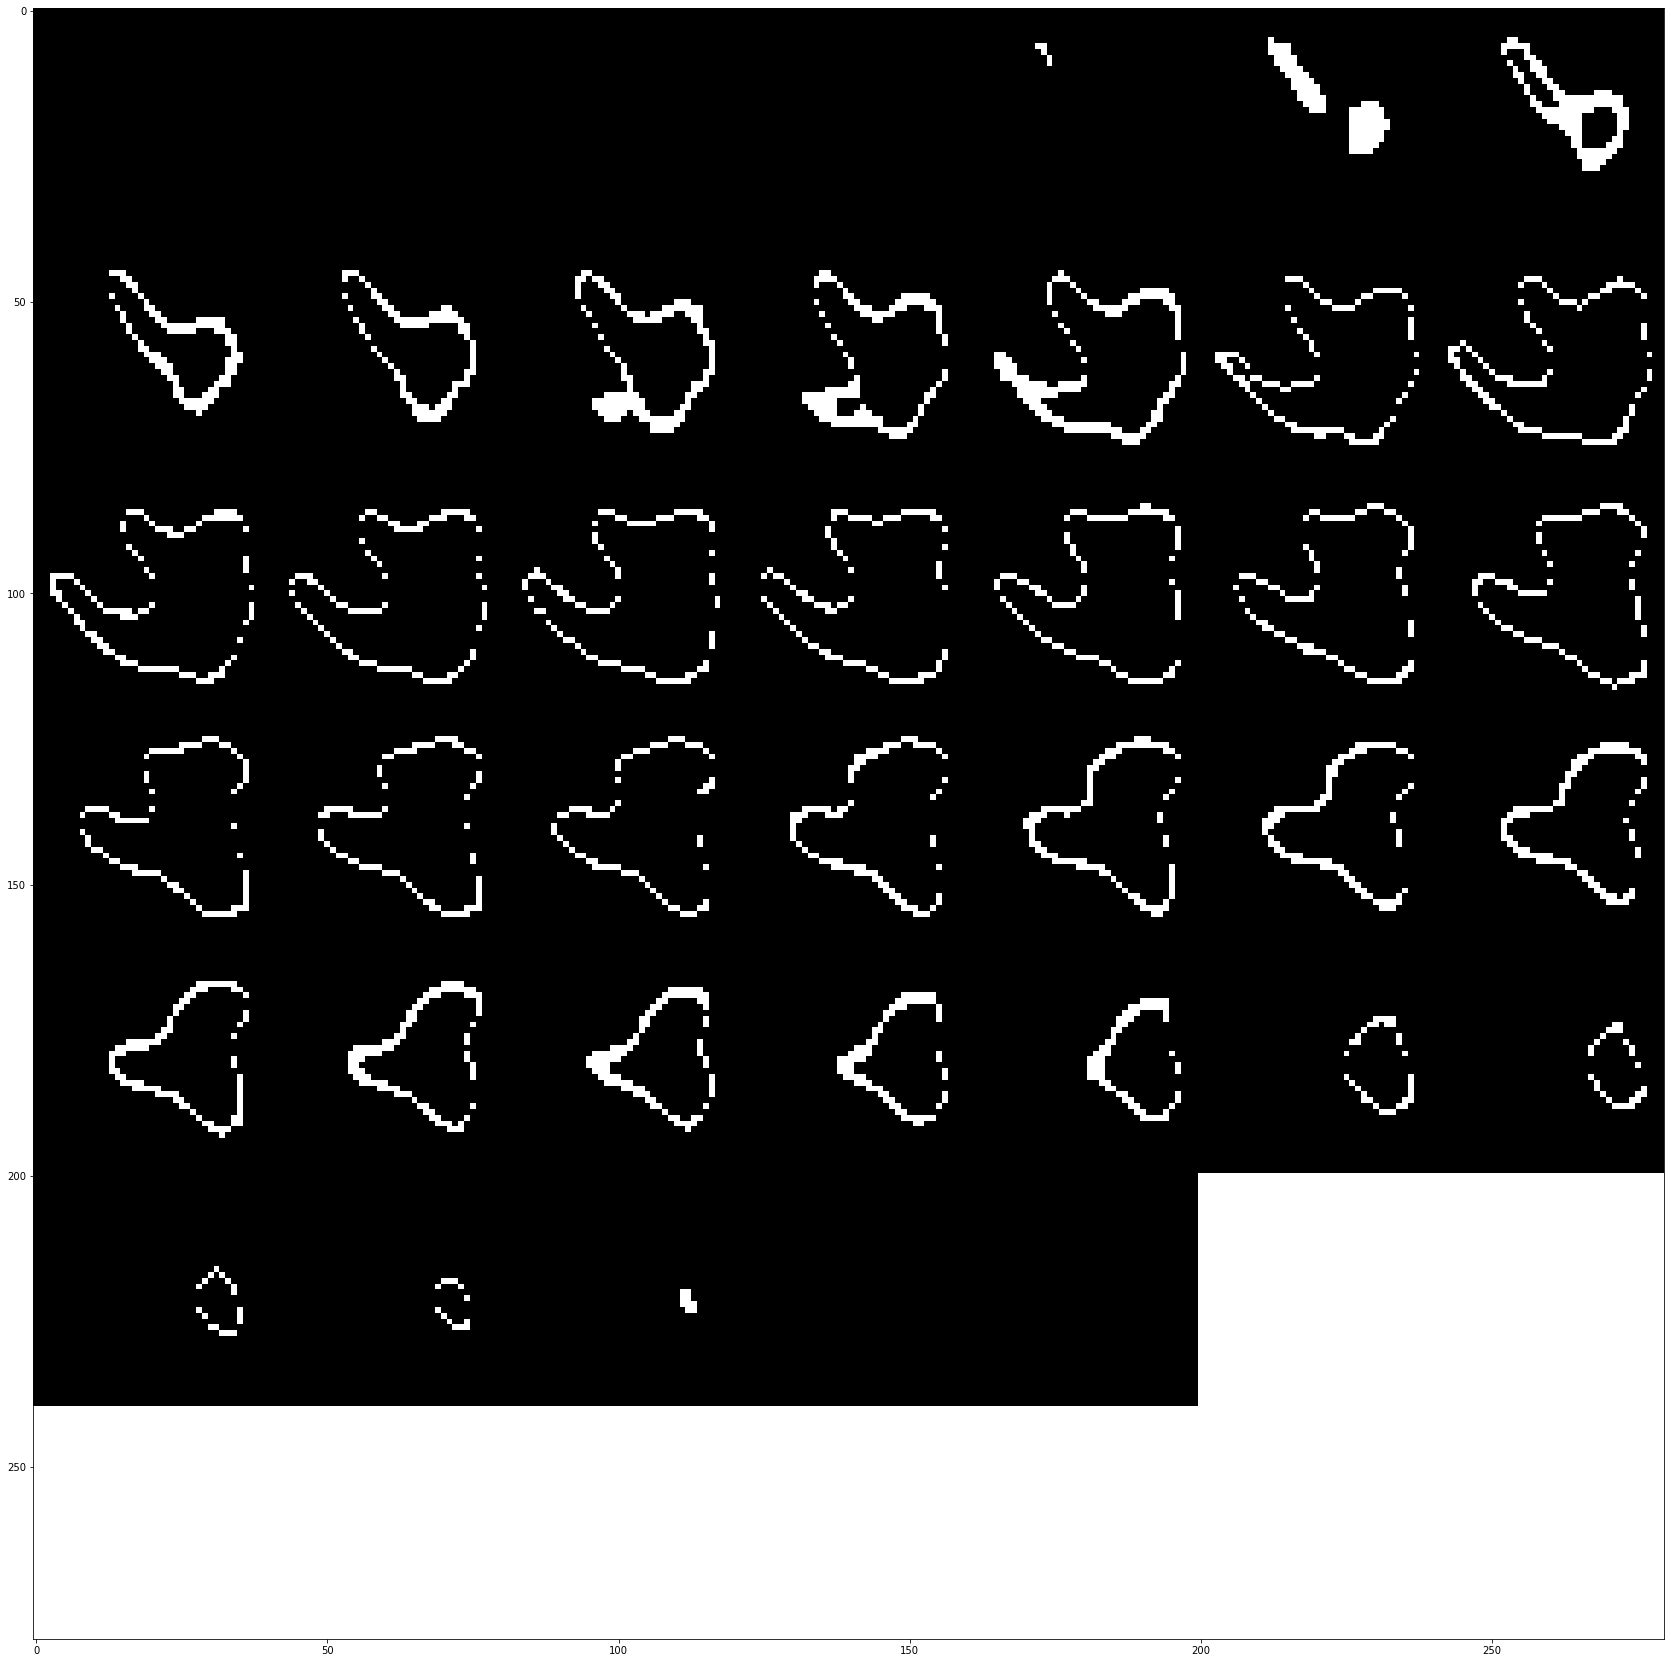

In [14]:
def train_segmentation2(task,TYPE):
    dirs = os.listdir(data_dir_test_mask)
    #print(os.listdir(os.path.join(data_dir_train_mask,'molar')))
    for d in os.listdir(data_dir_train_image1):
        for niiImage in os.listdir(os.path.join(data_dir_train_image1,d)):
                print(d)
                inputs = nib.load( os.path.join(data_dir_train_image1,d, niiImage)).get_fdata()
                mask = nib.load( os.path.join(data_dir_train_mask1,d, niiImage)).get_fdata()
                print(niiImage)
                inputs = normalizeImageIntensityRange(inputs) 
                inputs = exposure.equalize_hist(inputs)
               

                resize_image = resize(inputs, (IMAGE_HEIGHT, IMAGE_WIDTH,IMAGE_DEPTH), anti_aliasing=True)
                resize_mask =np.round(resize(mask, (IMAGE_HEIGHT, IMAGE_WIDTH,IMAGE_DEPTH), anti_aliasing=True) )#.astype(int)
                
                print(np.unique(resize_mask))
                
          
                total = resize_mask.shape[0]*resize_mask.shape[1]*resize_mask.shape[2]
                black = (resize_mask.flatten()).sum() 
                white = total - black
                print("total: ",total)
                print("tooth: ",black/total)
                print("background : ",white/total)

                img_np = np.rollaxis(np.array(np.array([np.array([np.array(resize_image)]) ])),0,5)
                pred1 = ((model.predict(img_np)>0.5).astype(float))
                pred1 =resize_data(pred1[0][:,:,:,0],(IMAGE_HEIGHT, IMAGE_WIDTH,IMAGE_DEPTH))
                pred_mask  = (resize_data(pred1,inputs.shape))
                print(pred1.shape)
                total2 = pred1.shape[0]*pred1.shape[1]*pred1.shape[2]
                black2 = (pred1.flatten()).sum()
                white2 = total2 - black2
                
                print("predicted total: ",total2)
                print("predicted tooth: ",black2/total2)
                print("predicted background : ",white2/total2)
            
                print("tooth pixel accuracy", (pred1==resize_mask).sum()/total)
                m = tf.keras.metrics.FalsePositives()
                m.update_state(resize_mask, pred1)
                print("false positives",m.result().numpy())
                
                m = tf.keras.metrics.FalseNegatives()
                m.update_state(resize_mask, pred1)
                print("false negatives",m.result().numpy())

                 #if(pred1!=resize_mask):
                   # pred1[0] = 
            
                imag2 = convert_array_to_image(montage(pred1!=resize_mask),'mask.png')  
                fig, ax1 = plt.subplots(1, 1, figsize = (30, 30))
                ax1.imshow(imag2, cmap ='gray')
             #   display_monatage(resize_mask,pred_mask)
              #  from skimage.util import montage, crop
              #  fig, ax1 = plt.subplots(1,1, figsize = (20, 20))
              #  ax1.imshow(montage(resize_mask), cmap ='bone')
    return None


train_segmentation2('segmentation','leftMolar')


In [5]:
train_segmentation2('segmentation',['leftCanine'])

In [4]:
def train_segmentation3(task,TYPE):
    dirs = os.listdir(data_dir_test_mask)
    #print(os.listdir(os.path.join(data_dir_train_mask,'molar')))
    for d in dirs:
        if d ==TYPE:
            for niiImage in os.listdir(os.path.join(data_dir_test_mask,d)):
                print(niiImage)
                inputs = nib.load( os.path.join(data_dir_test_image,d, niiImage)).get_fdata()
                msk = nib.load( os.path.join(data_dir_test_mask,d, niiImage))
                mask = msk.get_fdata()
                print(mask.shape)
                inputs = normalizeImageIntensityRange(inputs) 
                inputs = exposure.equalize_hist(inputs)
               

                #resize_image = resize(inputs, (40, 40, 40), anti_aliasing=True)
               # resize_image = rescale(inputs, 0.5,anti_aliasing=False)
               # print(resize_image.shape)
                #resize_mask =np.round(resize(mask, (40, 40, 40), anti_aliasing=True) )#.astype(int)
                
                resize_mask =np.round(resize(mask, (64, 64, 64), anti_aliasing=True) )
                print(resize_mask.shape)
                vertices,faces,_,_ = marching_cubes(resize_mask)

                mp.plot(vertices, faces, return_plot=False)
               
    return None


train_segmentation3('segmentation','molar')

6.12.93.nii
(74, 67, 96)
(64, 64, 64)


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(40.5, 29.…

9.1.81.nii
(77, 69, 96)
(64, 64, 64)


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(35.5, 33.…

29.11.92.nii
(82, 60, 94)
(64, 64, 64)


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(36.0, 36.…

1.2.80.nii
(45, 45, 90)
(64, 64, 64)


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(35.75, 32…

29.6.67.nii
(65, 53, 108)
(64, 64, 64)


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(40.0, 33.…

29.4.78.nii
(77, 65, 101)
(64, 64, 64)


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(39.0, 31.…

6.12.93.nii
(74, 67, 96)
[[-0.9        -0.9        -0.9        -0.9        -0.9        -0.9
  -0.9        -0.9        -0.9        -0.9        -0.9        -0.9
  -0.9        -0.9        -0.9        -0.9        -0.9        -0.9
  -0.9        -0.9        -0.9        -0.9        -0.9        -0.9
  -0.9        -0.9        -0.9        -0.9        -0.9        -0.9
  -0.9        -0.9        -0.9        -0.9        -0.9        -0.9
  -0.9        -0.9        -0.9        -0.9        -0.9        -0.9
  -0.9        -0.9        -0.9        -0.9        -0.9        -0.9
  -0.9        -0.9        -0.9        -0.9        -0.9        -0.9
  -0.9        -0.9        -0.9        -0.9        -0.9        -0.9
  -0.9        -0.9        -0.9        -0.9        -0.9        -0.9
  -0.9       ]
 [-0.9        -0.9        -0.9        -0.9        -0.9        -0.9
  -0.9        -0.9        -0.9        -0.9        -0.9        -0.9
  -0.9        -0.9        -0.9        -0.9        -0.9        -0.9
  -0.9        -0.9    

[[-0.9        -0.9        -0.9        -0.9        -0.9        -0.9
  -0.9        -0.9        -0.9        -0.9        -0.9        -0.9
  -0.9        -0.9        -0.9        -0.9        -0.9        -0.9
  -0.9        -0.9        -0.9        -0.9        -0.9        -0.9
  -0.9        -0.9        -0.9        -0.9        -0.9        -0.9
  -0.9        -0.9        -0.9        -0.9        -0.9        -0.9
  -0.9        -0.9        -0.9        -0.9        -0.9        -0.9
  -0.9        -0.9        -0.9        -0.9        -0.9        -0.9
  -0.9        -0.9        -0.9        -0.9        -0.9        -0.9
  -0.9        -0.9        -0.9        -0.9        -0.9        -0.9
  -0.9        -0.9        -0.9        -0.9        -0.9        -0.9
  -0.9        -0.9        -0.9       ]
 [-0.9        -0.9        -0.9        -0.9        -0.9        -0.9
  -0.9        -0.9        -0.9        -0.9        -0.9        -0.9
  -0.9        -0.9        -0.9        -0.9        -0.9        -0.9
  -0.9        -0.9     

[[-0.9        -0.9        -0.9        -0.9        -0.9        -0.9
  -0.9        -0.9        -0.9        -0.9        -0.9        -0.9
  -0.9        -0.9        -0.9        -0.9        -0.9        -0.9
  -0.9        -0.9        -0.9        -0.9        -0.9        -0.9
  -0.9        -0.9        -0.9        -0.9        -0.9        -0.9
  -0.9        -0.9        -0.9        -0.9        -0.9        -0.9
  -0.9        -0.9        -0.9        -0.9        -0.9        -0.9
  -0.9        -0.9        -0.9        -0.9        -0.9        -0.9
  -0.9        -0.9        -0.9        -0.9        -0.9        -0.9
  -0.9        -0.9        -0.9        -0.9        -0.9        -0.9       ]
 [-0.9        -0.9        -0.9        -0.9        -0.9        -0.9
  -0.9        -0.9        -0.9        -0.9        -0.9        -0.9
  -0.9        -0.9        -0.9        -0.9        -0.9        -0.9
  -0.9        -0.9        -0.9        -0.9        -0.9        -0.9
  -0.9        -0.9        -0.9        -0.9        -0.9

29.6.67.nii
(65, 53, 108)
[[-0.9        -0.9        -0.9        -0.9        -0.9        -0.9
  -0.9        -0.9        -0.9        -0.9        -0.9        -0.9
  -0.9        -0.9        -0.9        -0.9        -0.9        -0.9
  -0.9        -0.9        -0.9        -0.9        -0.9        -0.9
  -0.9        -0.9        -0.9        -0.9        -0.9        -0.9
  -0.9        -0.9        -0.9        -0.9        -0.9        -0.9
  -0.9        -0.9        -0.9        -0.9        -0.9        -0.9
  -0.9        -0.9        -0.9        -0.9        -0.9        -0.9
  -0.9        -0.9        -0.9        -0.9        -0.9       ]
 [-0.9        -0.9        -0.9        -0.9        -0.9        -0.9
  -0.9        -0.9        -0.9        -0.9        -0.9        -0.9
  -0.9        -0.9        -0.9        -0.9        -0.9        -0.9
  -0.9        -0.9        -0.9        -0.9        -0.9        -0.9
  -0.9        -0.9        -0.9        -0.9        -0.9        -0.9
  -0.9        -0.9        -0.9        -0

[[-0.9        -0.9        -0.9        -0.9        -0.9        -0.9
  -0.9        -0.9        -0.9        -0.9        -0.9        -0.9
  -0.9        -0.9        -0.9        -0.9        -0.9        -0.9
  -0.9        -0.9        -0.9        -0.9        -0.9        -0.9
  -0.9        -0.9        -0.9        -0.9        -0.9        -0.9
  -0.9        -0.9        -0.9        -0.9        -0.9        -0.9
  -0.9        -0.9        -0.9        -0.9        -0.9        -0.9
  -0.9        -0.9        -0.9        -0.9        -0.9        -0.9
  -0.9        -0.9        -0.9        -0.9        -0.9        -0.9
  -0.9        -0.9        -0.9        -0.9        -0.9        -0.9
  -0.9        -0.9        -0.9        -0.9        -0.9       ]
 [-0.9        -0.9        -0.9        -0.9        -0.9        -0.9
  -0.9        -0.9        -0.9        -0.9        -0.9        -0.9
  -0.9        -0.9        -0.9        -0.9        -0.9        -0.9
  -0.9        -0.9        -0.9        -0.9        -0.9        -0.9

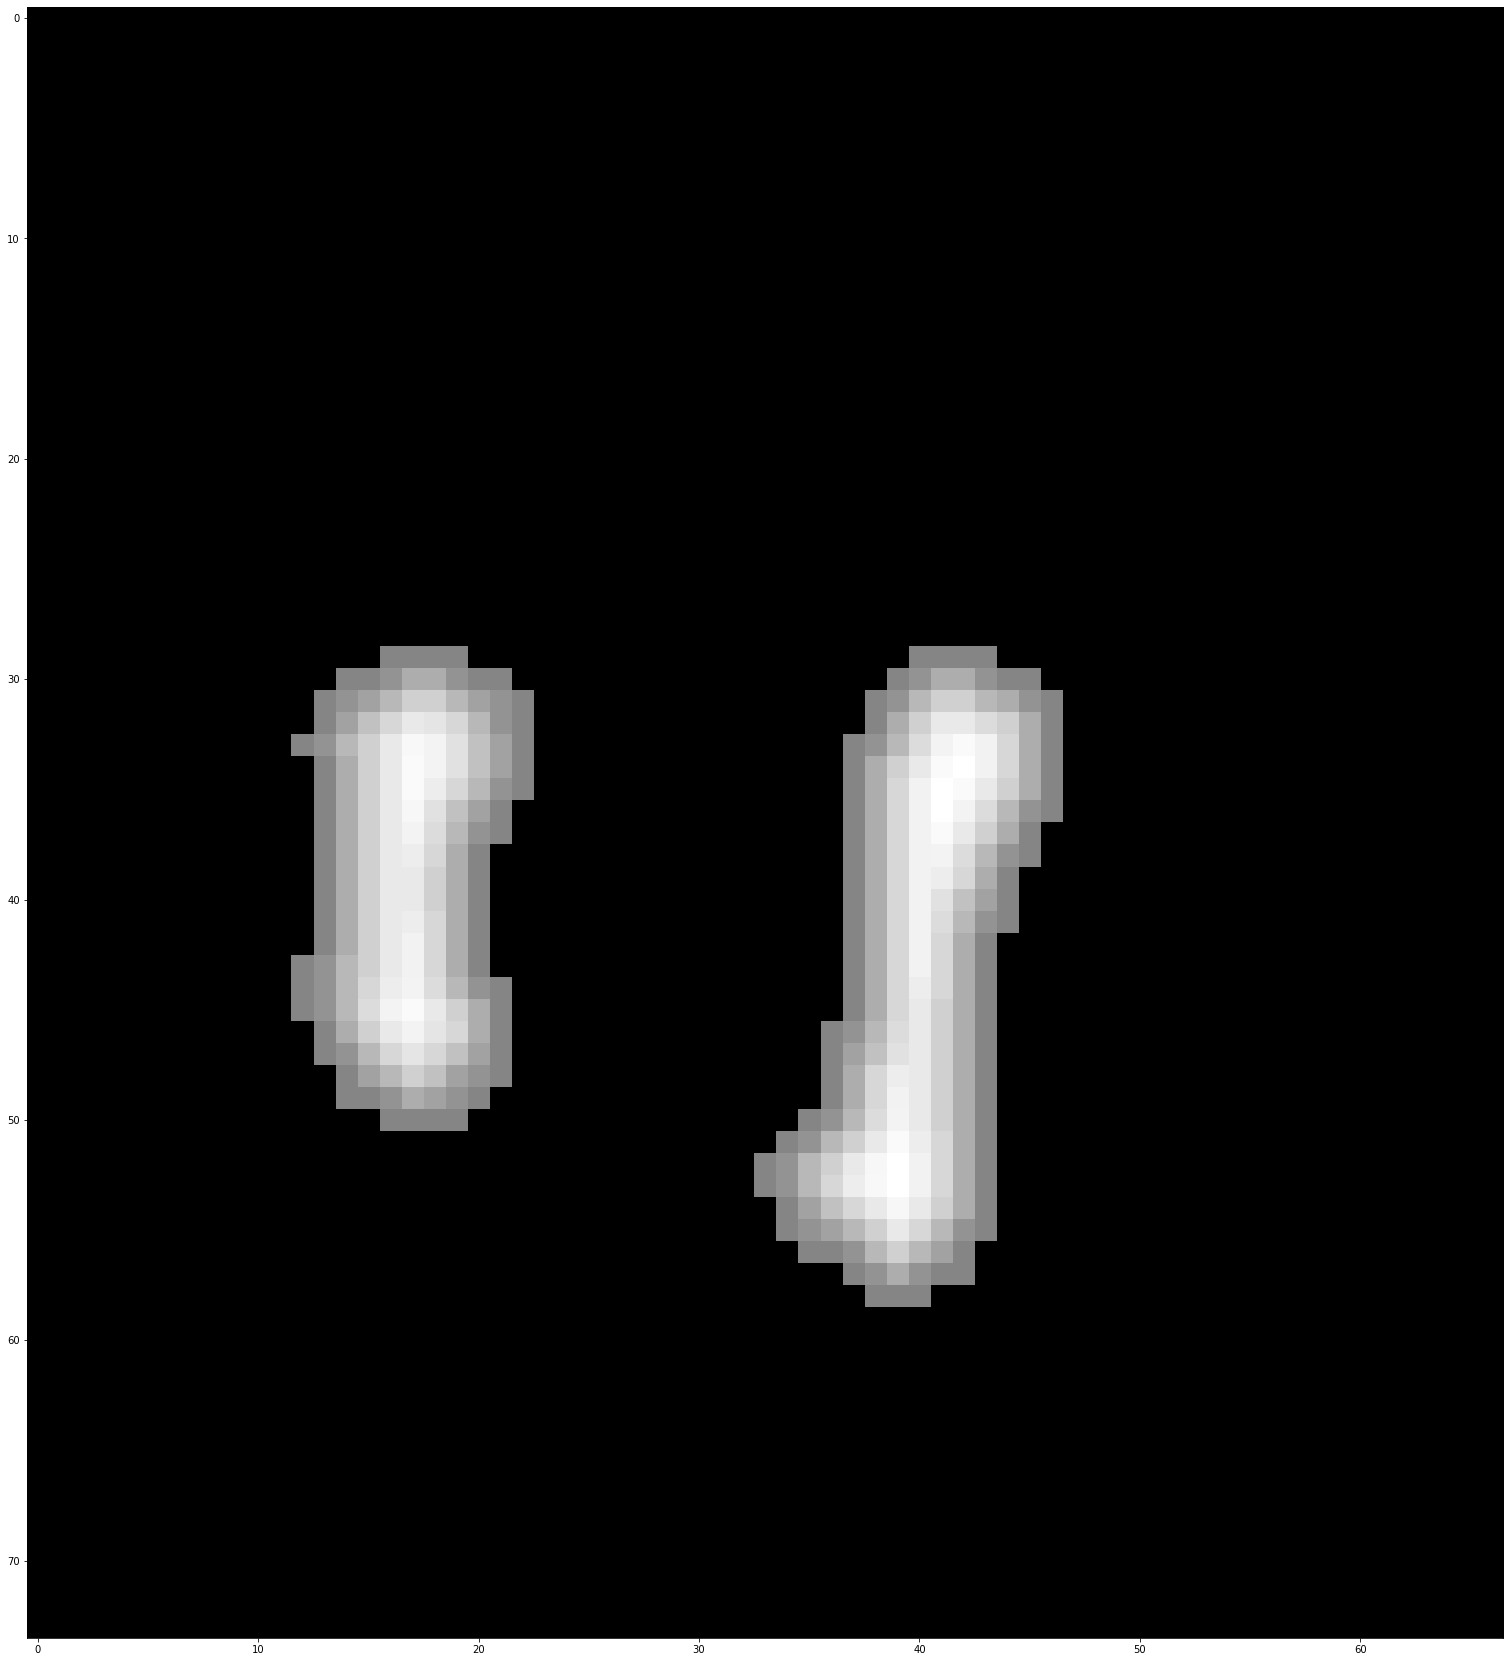

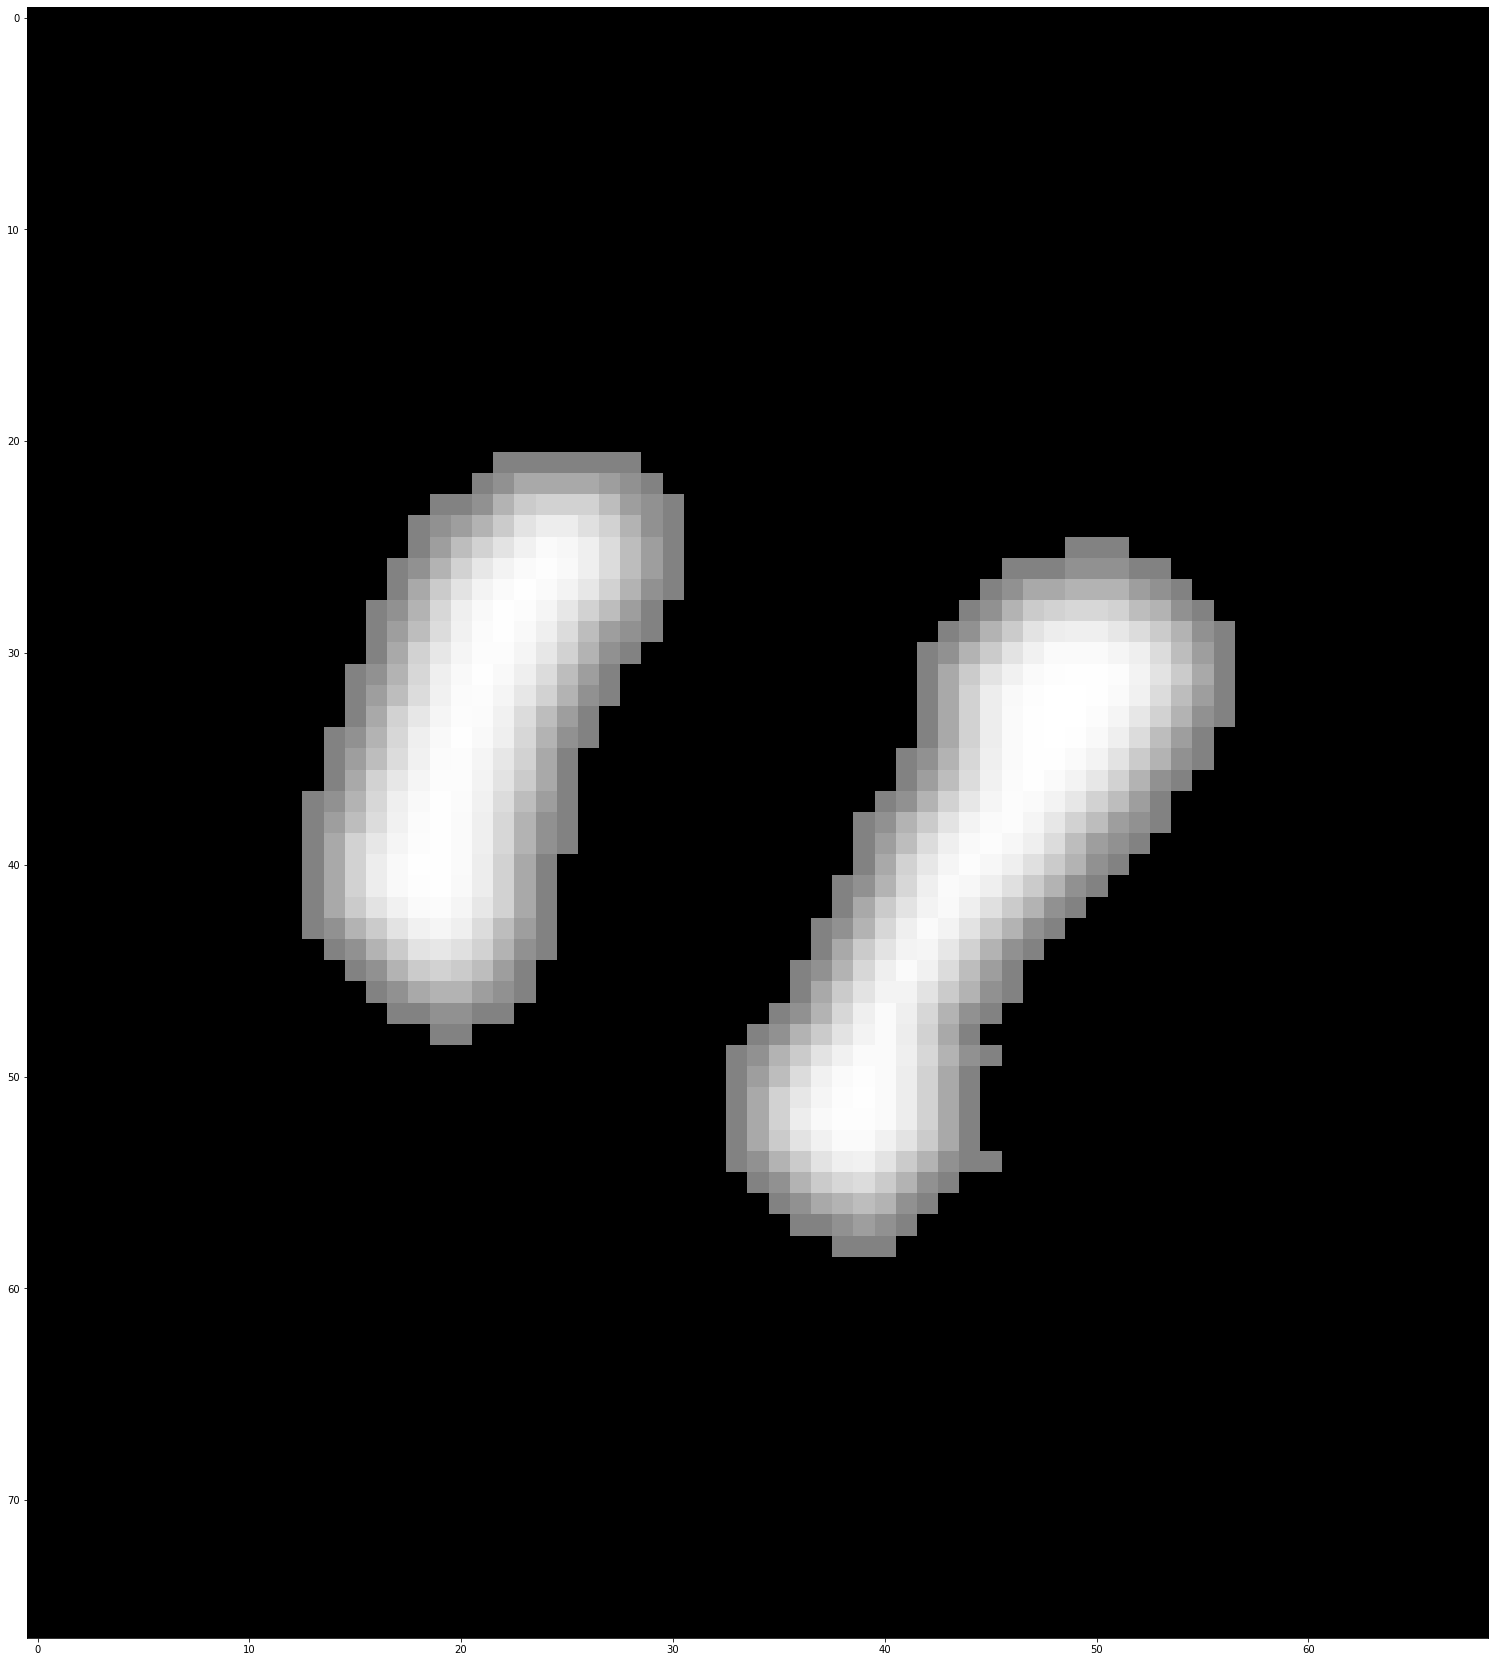

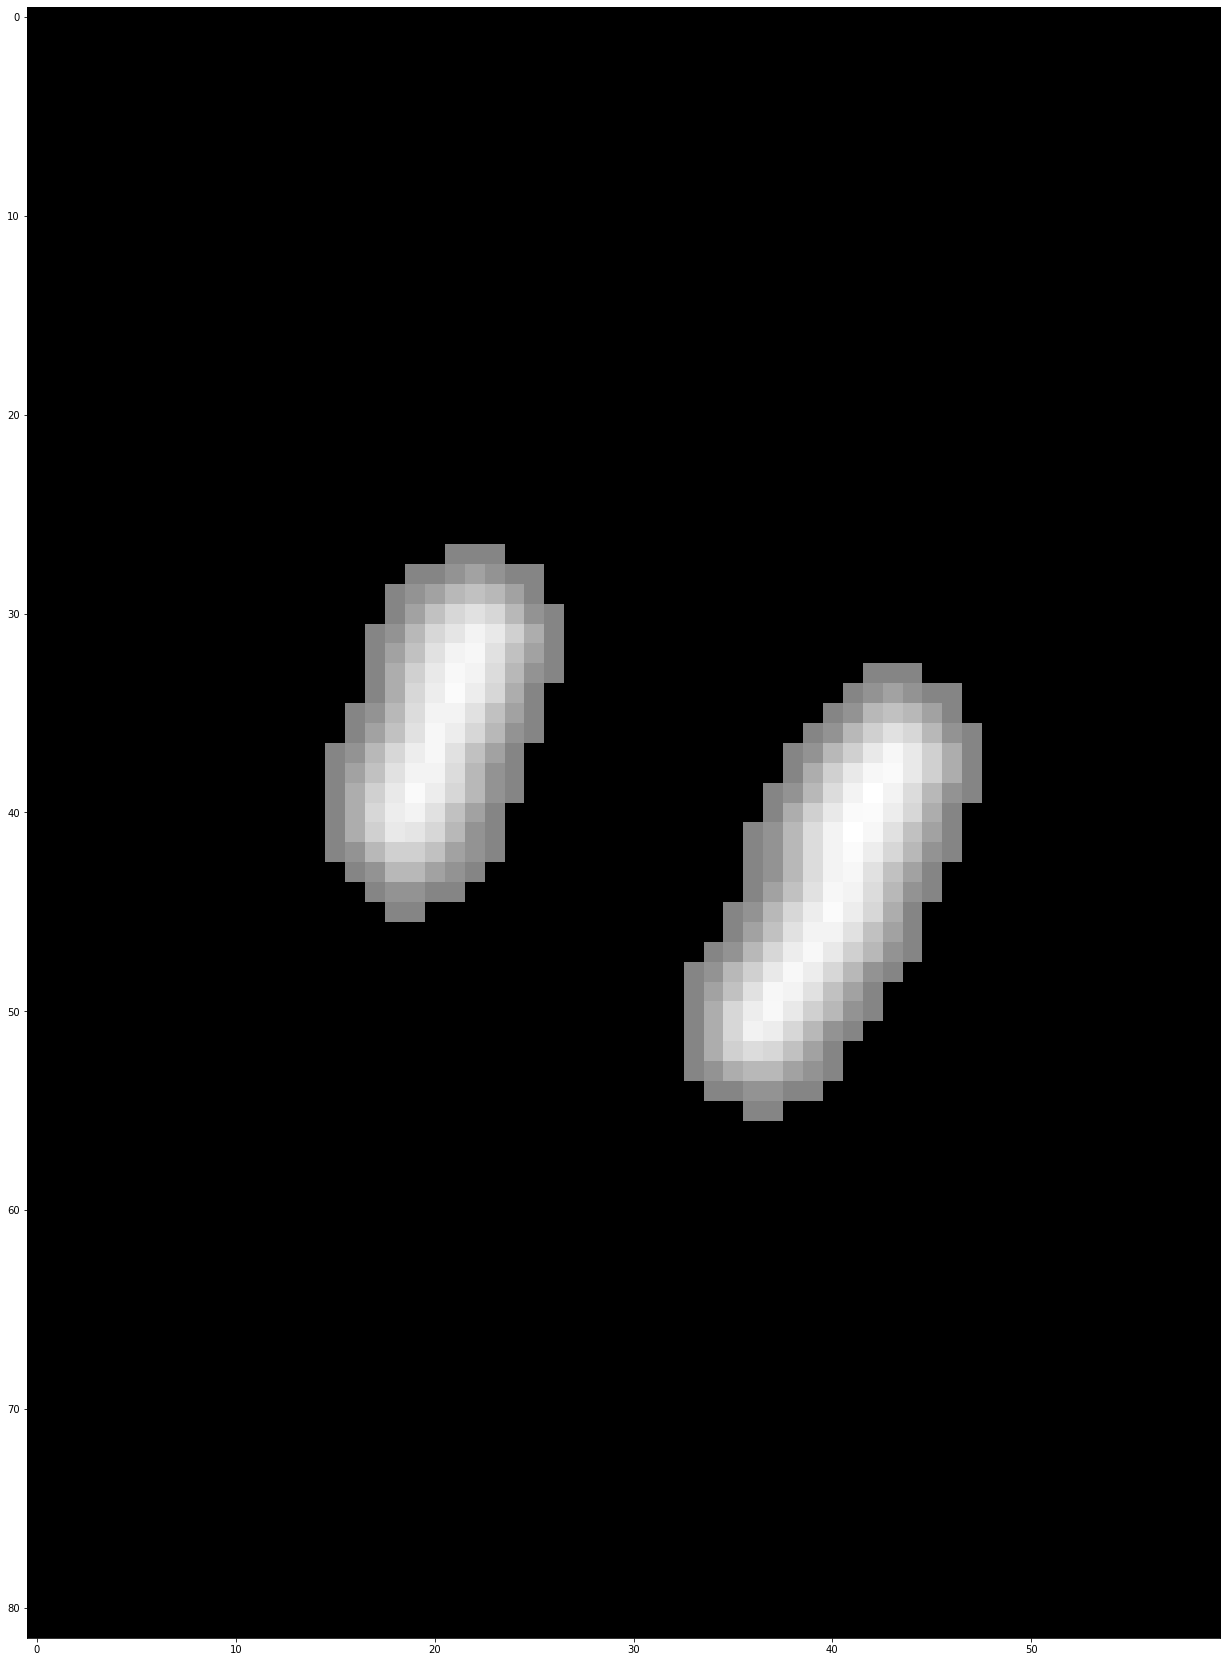

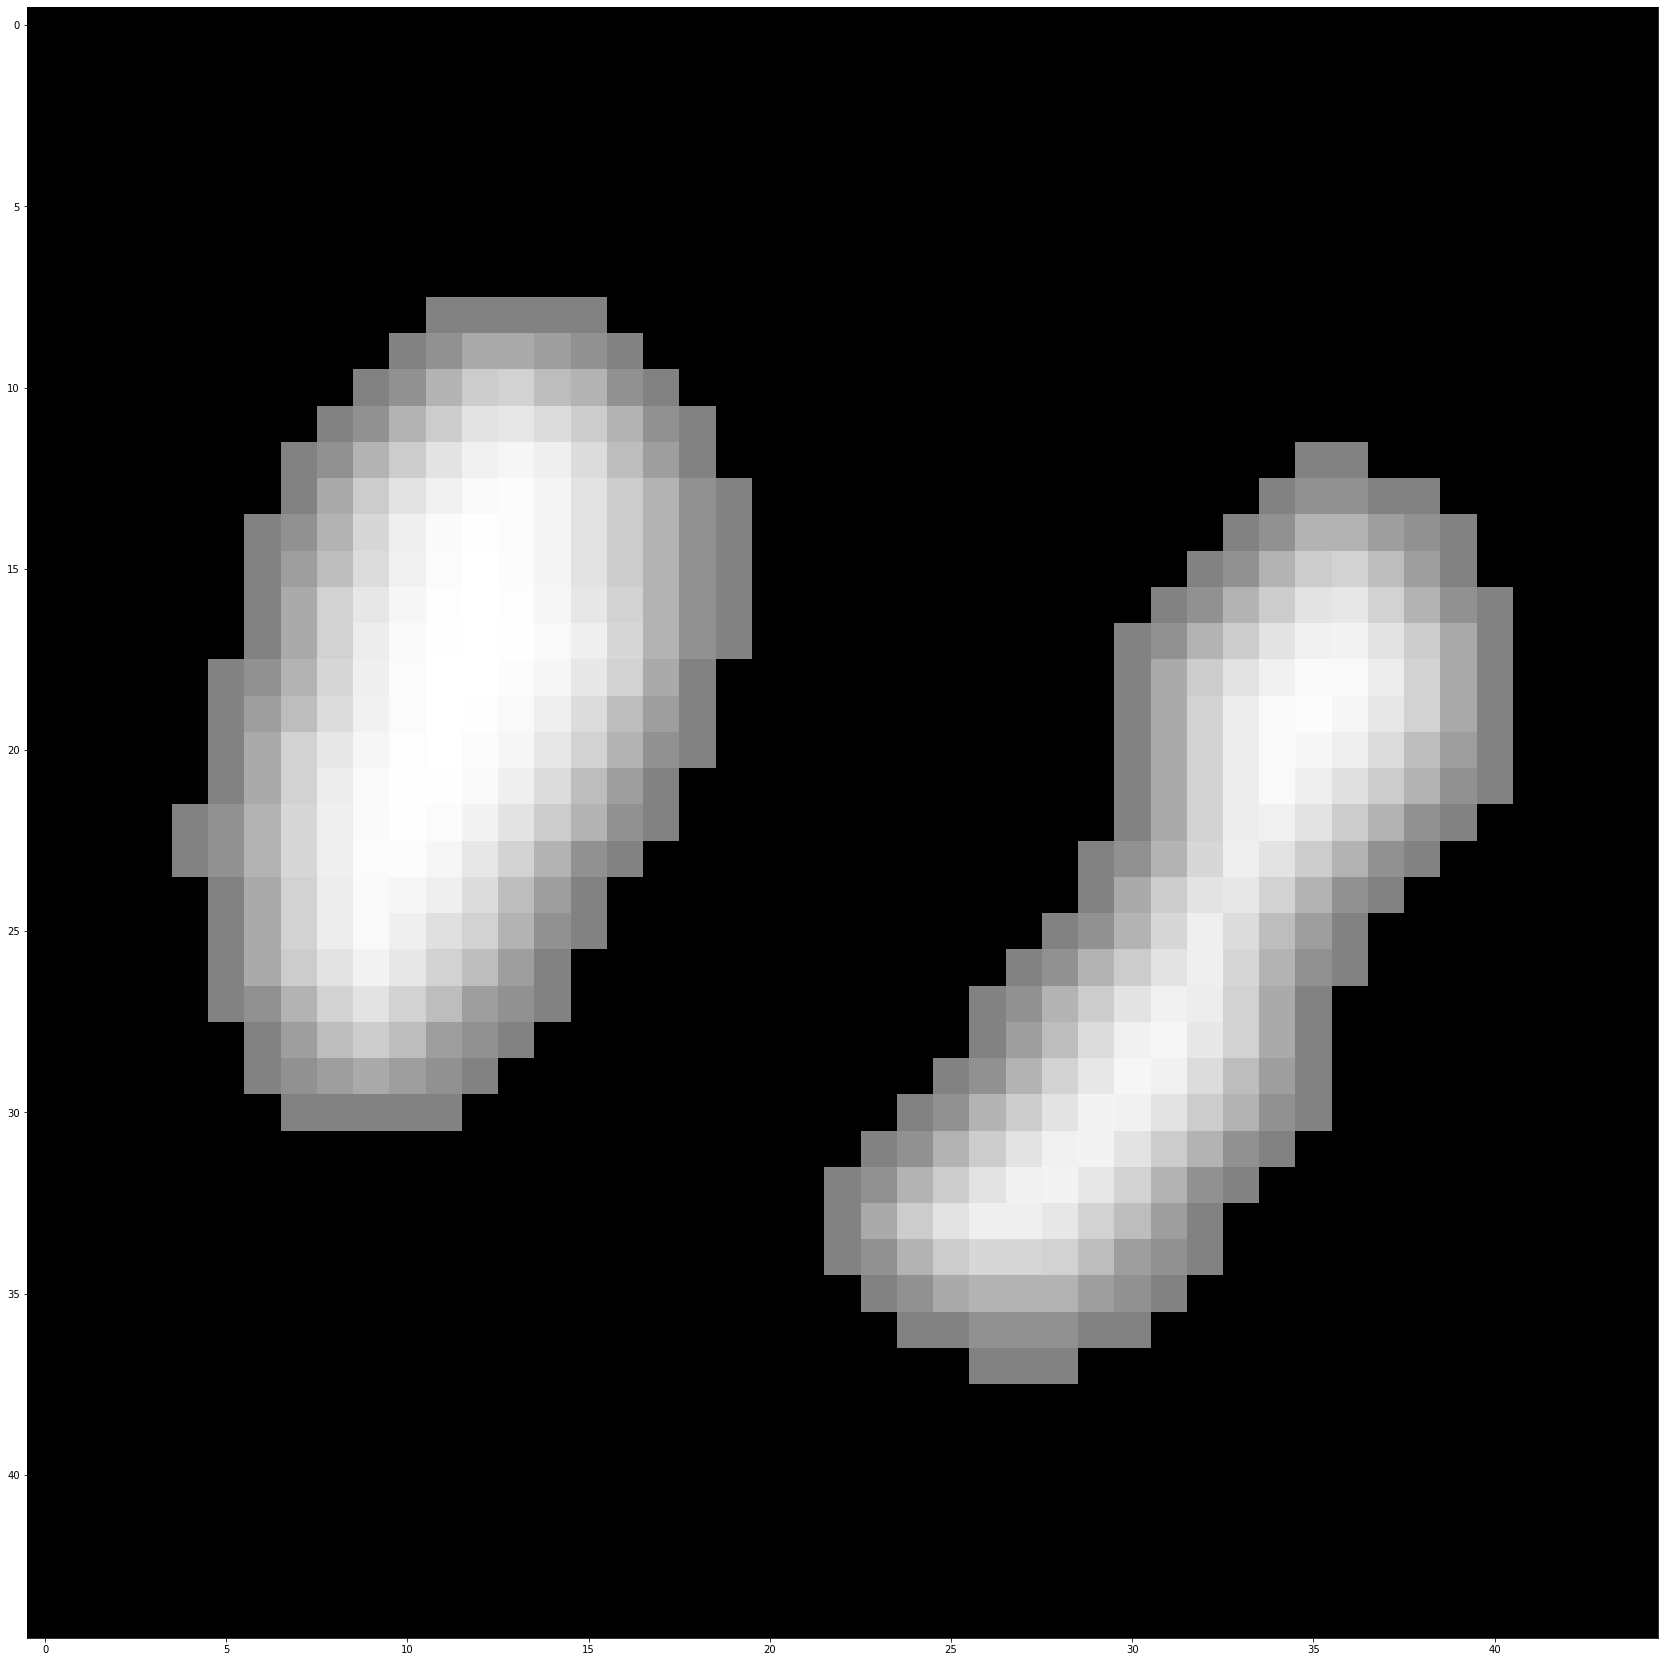

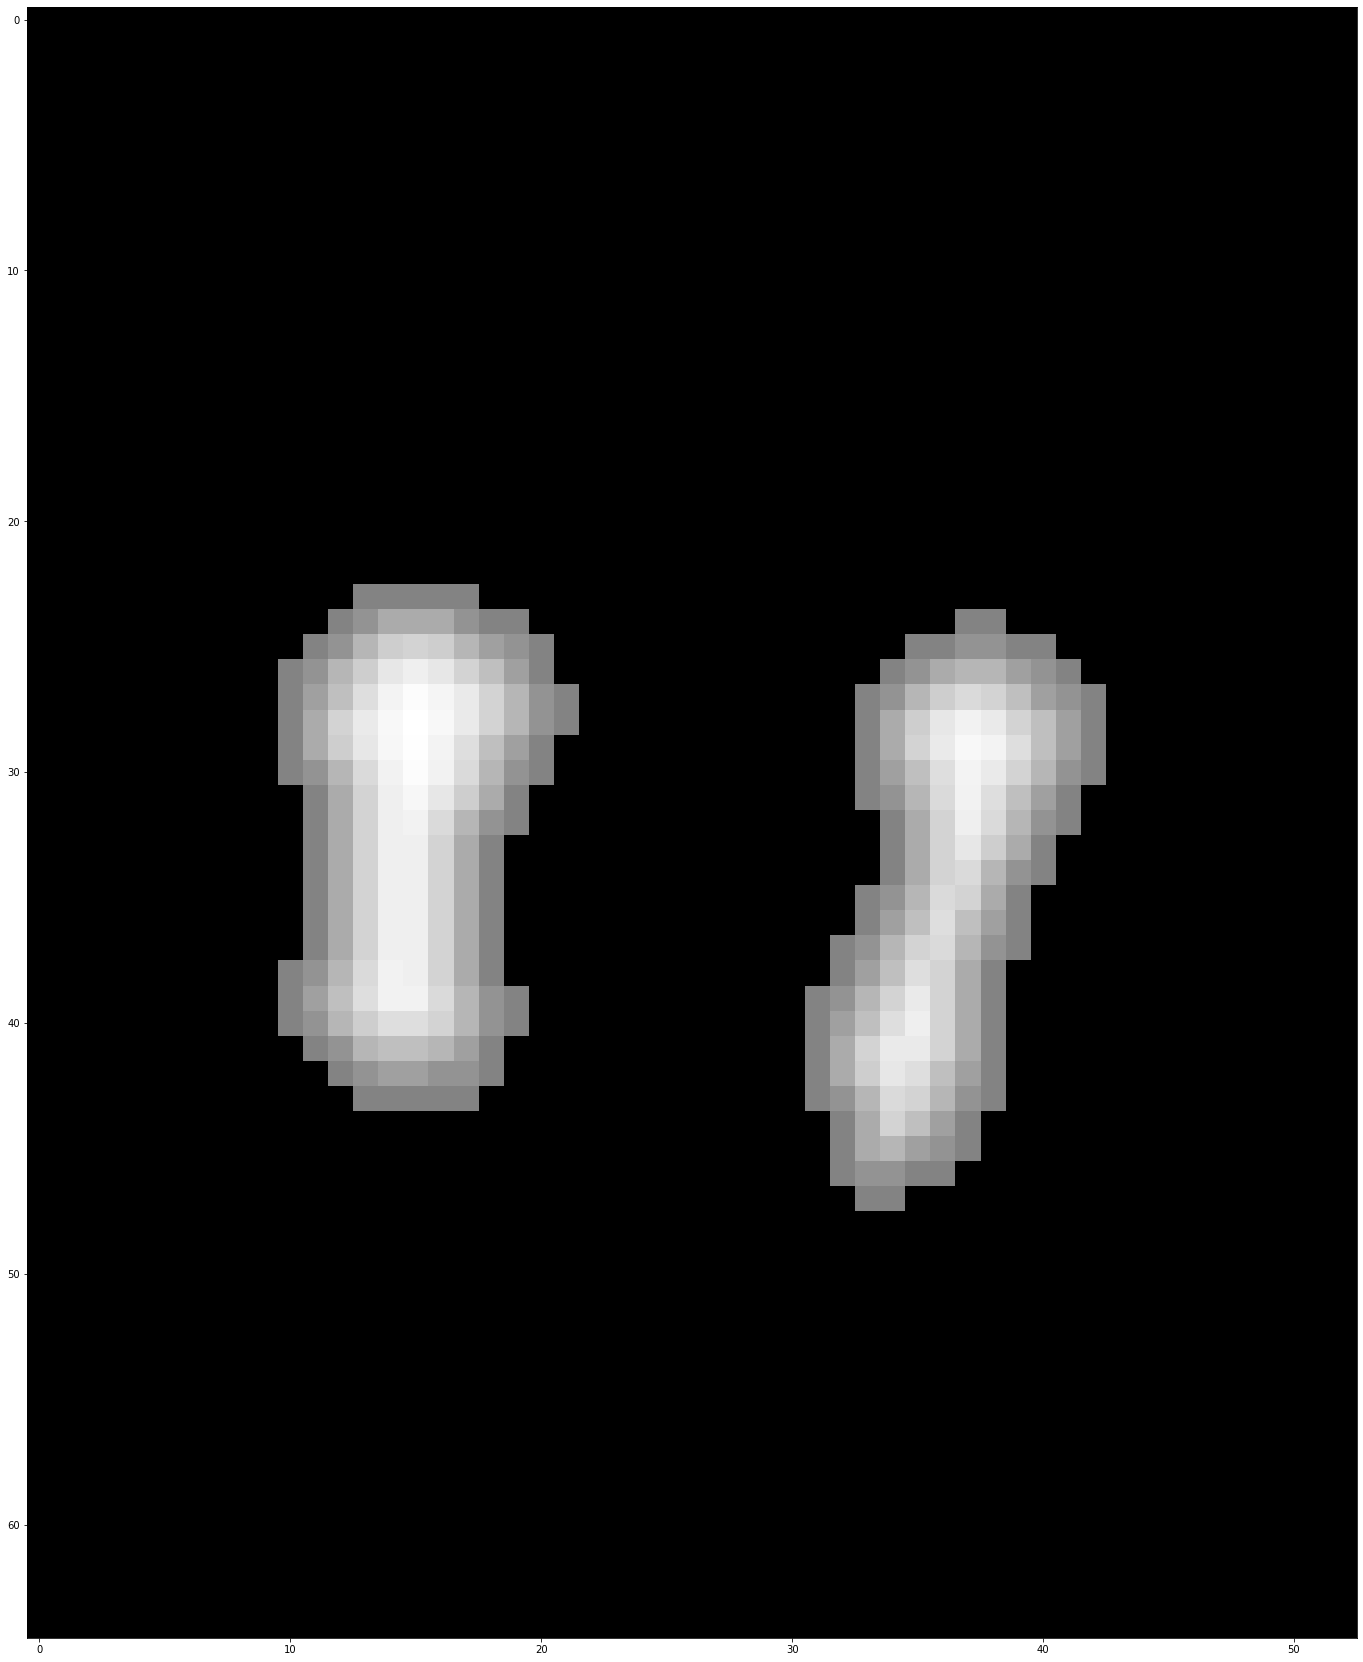

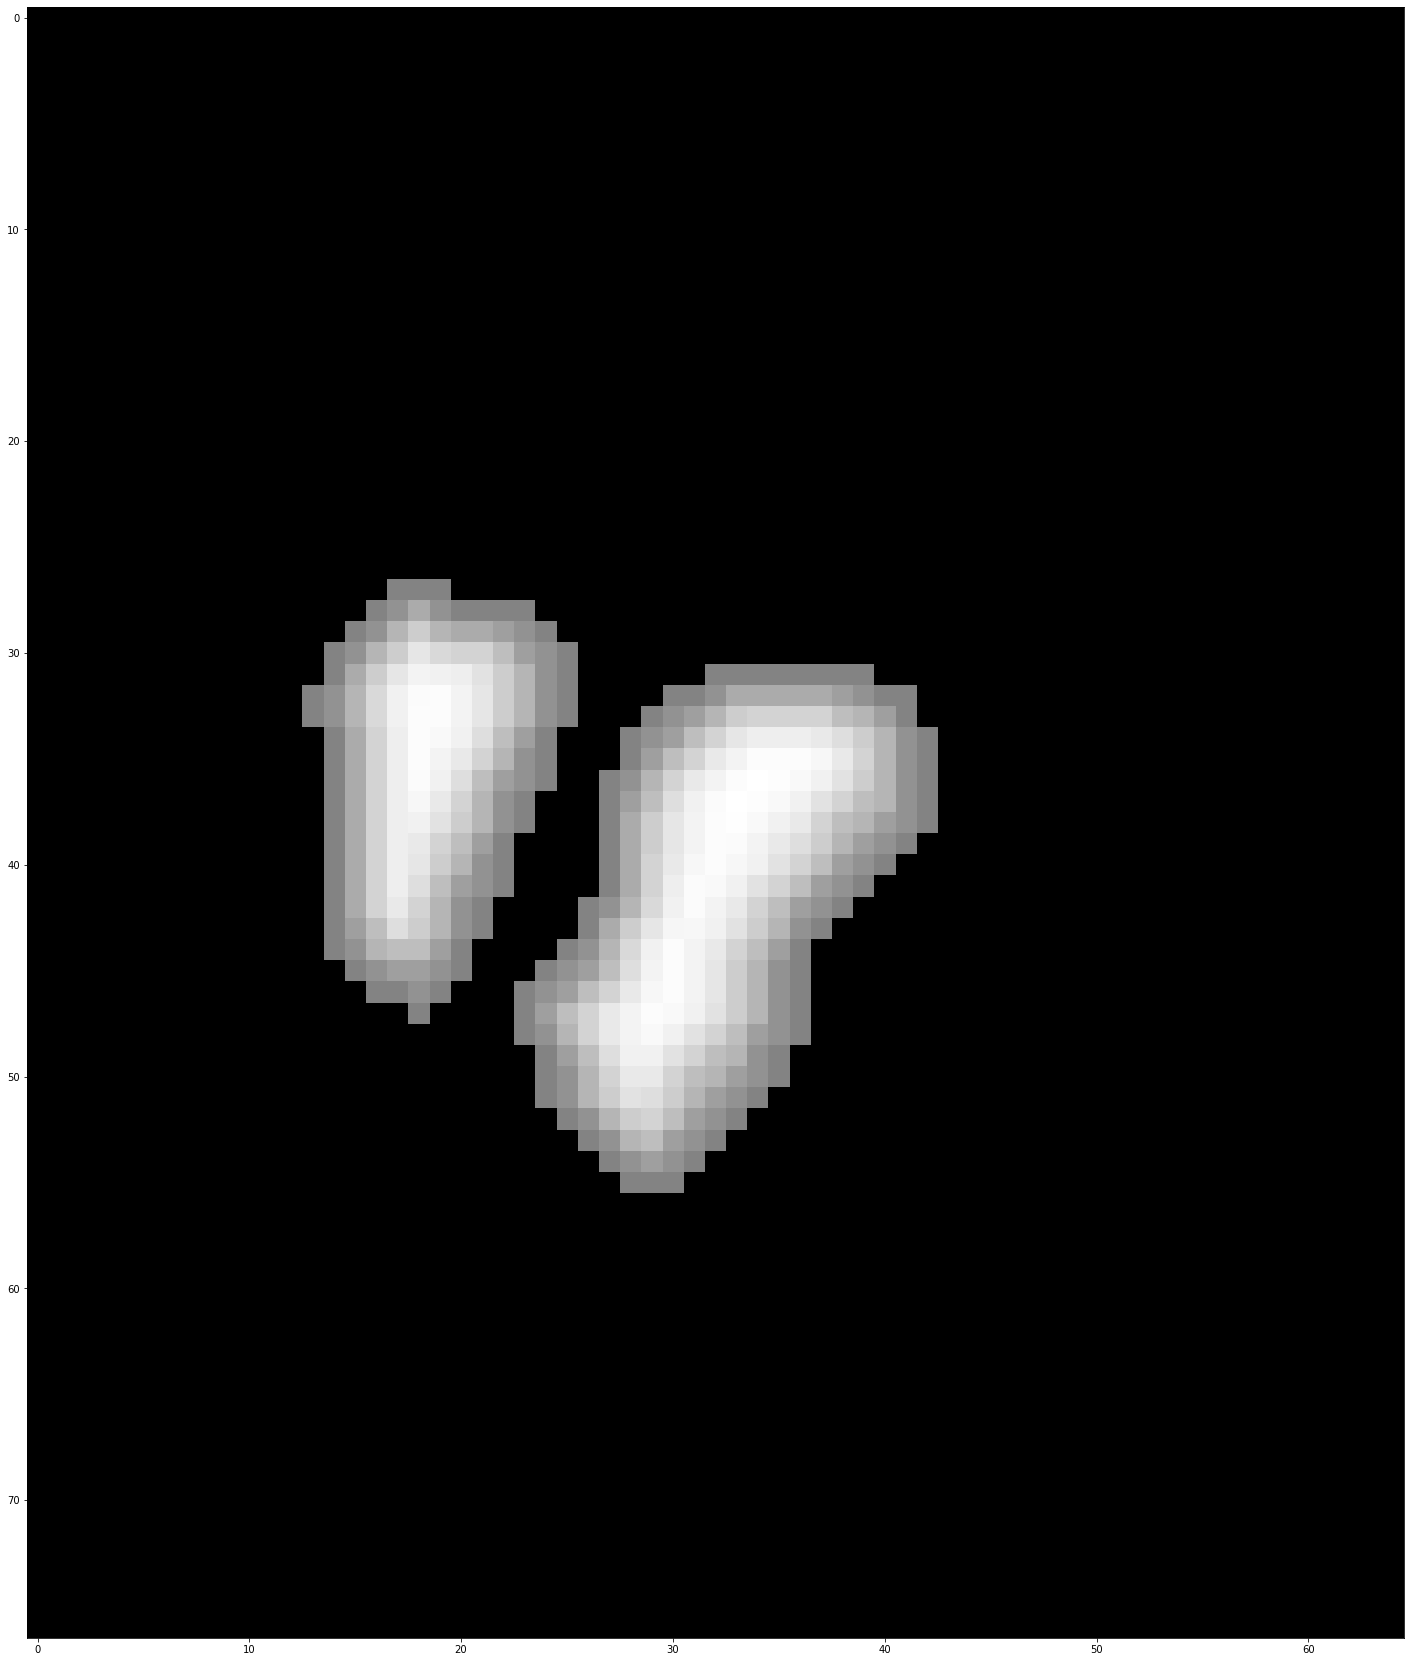

In [5]:
def train_segmentation4(task,TYPE):
    dirs = os.listdir(data_dir_test_mask)
    #print(os.listdir(os.path.join(data_dir_train_mask,'molar')))
    for d in dirs:
        if d ==TYPE:
            for niiImage in os.listdir(os.path.join(data_dir_test_mask,d)):
                print(niiImage)
                inputs = nib.load( os.path.join(data_dir_test_image,d, niiImage)).get_fdata()
                msk = nib.load( os.path.join(data_dir_test_mask,d, niiImage))
                mask = np.round(msk.get_fdata())
                print(mask.shape)
                inputs = normalizeImageIntensityRange(inputs) 
                inputs = exposure.equalize_hist(inputs)
               
                fig, ax1 = plt.subplots(1, 1, figsize = (30, 30))
                
                wc = {0: 0.5,1: 1}
                m=unet_weight_map(mask, wc, w0 = 1, sigma = 2)
                with np.printoptions(threshold=np.inf):
                    print(unet_weight_map(mask, wc, w0 = 1, sigma = 2)[:,:,40])
                ax1.imshow(unet_weight_map(mask, wc, w0 = 1, sigma = 2)[:,:,40],'gray')
    return None


train_segmentation4('segmentation','molar')

                
              

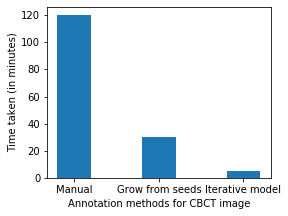

In [40]:

import matplotlib.pyplot as plt
import numpy as np
# Create data
height = [120,30,5]
bars = ('Manual', 'Grow from seeds', 'Iterative model')
#bars = ('A', 'B', 'C')
x_pos = np.arange(len(bars))
plt.figure(figsize=(4, 3))   
# Create bars
plt.bar(x_pos, height,width=[0.4, 0.4, 0.4],align='center')

# Rotation of the bar names
plt.xticks(x_pos, bars, rotation=0)
plt.xlabel('Annotation methods for CBCT image')
plt.ylabel('Time taken (in minutes)')
# Custom the subplot layout
plt.subplots_adjust(bottom=0.2, top=0.99)
 
# Show graphic
plt.show()



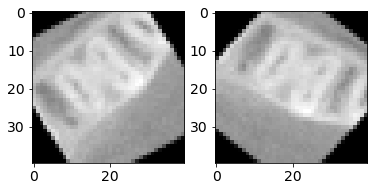

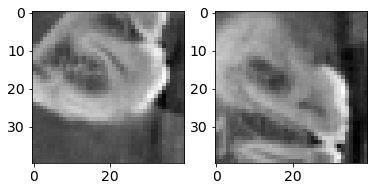

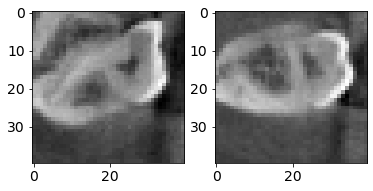

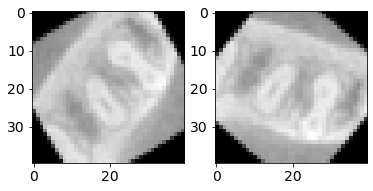

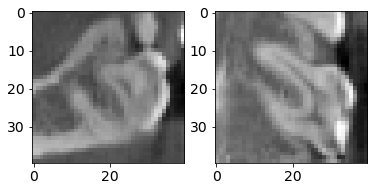

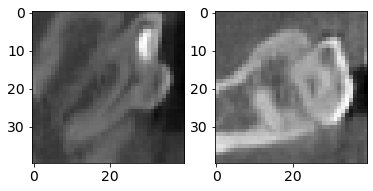

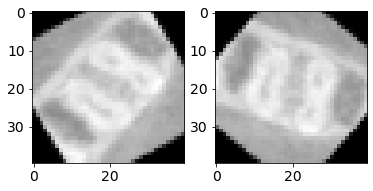

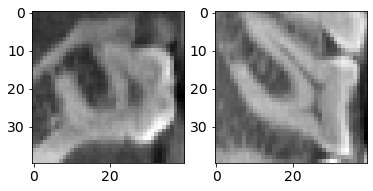

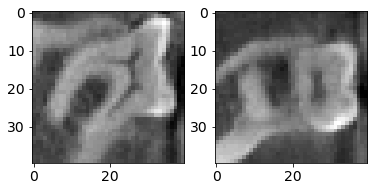

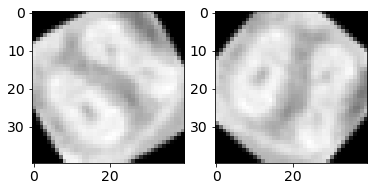

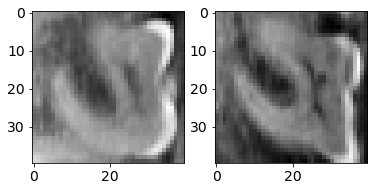

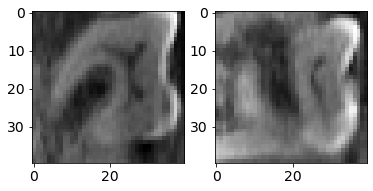

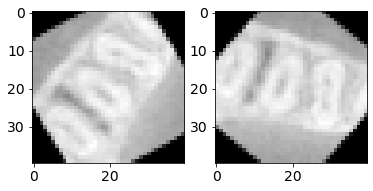

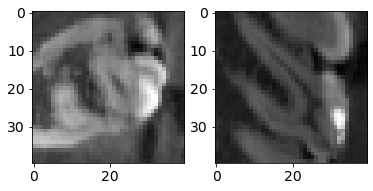

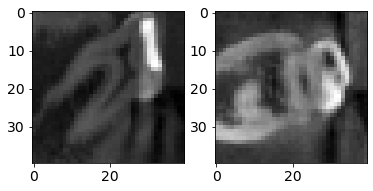

In [43]:
import matplotlib.pyplot as plt
import numpy as np
import os 
from config import *
import nibabel as nib
from skimage import exposure
from skimage.transform import rescale, resize, downscale_local_mean,rotate
import meshplot as mp
import tensorflow as tf
from skimage.measure import marching_cubes_lewiner

d='mandible-Right-Molar'
#for iterations in os.listdir(os.path.join(data_dir_train+str('image'),d)):
iterations='iteration1'    
for niiImage in os.listdir(os.path.join(data_dir_train,str('image'),d,'iteration1')):

    inputs2 = nib.load(os.path.join(data_dir_train,str('image'),d,iterations, niiImage)).get_fdata()
    mask = nib.load(os.path.join(data_dir_train,str('mask'),d, niiImage))

    #print(niiImage)
    inputs = normalizeImageIntensityRange(inputs2) 

   # inputs = exposure.equalize_hist(inputs)
  #  inputs1 = rescale(inputs, 0.25,anti_aliasing=False)
  #  inputs2 = rescale(inputs, 2,anti_aliasing=False)

    inputs1 = rotate(np.flipud(inputs),30)
    inputs2 = rotate(np.flipud(inputs),-40)
  #  inputs = exposure.equalize_hist(inputs2)
  #  inputs1 = (inputs2)

   # inputs2 = np.flipud(inputs)

    image = resize(inputs1, (IMAGE_HEIGHT, IMAGE_WIDTH,IMAGE_DEPTH), anti_aliasing=True)
    image2 = resize(inputs2, (IMAGE_HEIGHT, IMAGE_WIDTH,IMAGE_DEPTH), anti_aliasing=True)
 #   resize_image2 = resize(inputs2, (IMAGE_HEIGHT, IMAGE_WIDTH,IMAGE_DEPTH), anti_aliasing=True)
  #  resize_mask = resize(np.round(tf.image.central_crop(mask, 0.75)), (IMAGE_HEIGHT, IMAGE_WIDTH,IMAGE_DEPTH), anti_aliasing=True)

  #  fig, (ax1,ax2,ax4) = plt.subplots(1,3)
 #   ax1.imshow(np.squeeze(resize_image1[:, :, 15]), cmap="gray")
 #   ax2.imshow(np.squeeze(resize_image[:, :, 15]), cmap="gray")
 #   ax3.imshow(np.squeeze(resize_image2[:, :, 15]), cmap="gray")
 #   ax4.imshow(np.squeeze(resize_mask[:, :, 15]), cmap="gray")

    fig, (ax1,ax2) = plt.subplots(1,2)
    ax1.imshow(np.squeeze(image[:, :, 20]), cmap="gray")
    ax2.imshow(np.squeeze(image2[:, :, 20]), cmap="gray")

    fig, (ax1,ax2) = plt.subplots(1,2)
    ax1.imshow(np.squeeze(image[20]), cmap="gray")
    ax2.imshow(np.squeeze(image2[20]), cmap="gray")

    fig, (ax1,ax2) = plt.subplots(1,2)
    ax1.imshow(np.squeeze(image[:,20]), cmap="gray")
    ax2.imshow(np.squeeze(image2[:,20]), cmap="gray")

#    vertices,faces,_,_ = marching_cubes_lewiner(resize_image1)
#     mp.plot(vertices, faces,  c=vertices[:, 0])
#     vertices,faces,_,_ = marching_cubes_lewiner(resize_image)
#     mp.plot(vertices, faces,  c=vertices[:, 0])
#     vertices,faces,_,_ = marching_cubes_lewiner(resize_image2)
#     mp.plot(vertices, faces,  c=vertices[:, 0])


In [1]:
def random_crop(image):
    cropped_image = tf.image.random_crop(
      image, size=[40,40,40,1])

    return cropped_image